# Predicting NYC Housing Prices

## Goal of the Project
The goal of this project is to **predict housing prices in New York City** using a dataset that includes features such as property type, neighborhood, number of bedrooms, number of bathrooms, and area. By building a robust regression model, we aim to:

1. **Understand the key factors** that influence housing prices in NYC.
2. **Provide accurate price predictions** that can assist buyers, sellers, and real estate professionals in making informed decisions.
3. **Explore and visualize trends** in the housing market, such as the impact of location, property size, and type on pricing.

This project will involve:
- **Exploratory Data Analysis (EDA)** to uncover patterns and relationships in the data.
- **Feature Engineering** to create meaningful predictors from the raw data.
- **Model Development** using machine learning algorithms to predict housing prices.
- **Evaluation** of model performance using metrics like RMSE and R².


# Load, clean and first look the data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot

In [3]:
# Import dataset
file = '../data/NY-House-Dataset.csv'

In [4]:
# load the data
df = pd.read_csv(file)

In [5]:
# Inspect the data
df.head()

BROKERTITLE                TYPE  \
0        Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                Brokered by Serhant      Condo for sale   
2                             Brokered by Sowae Corp      House for sale   
3                                Brokered by COMPASS      Condo for sale   
4  Brokered by Sotheby's International Realty - E...  Townhouse for sale   

       PRICE  BEDS       BATH  PROPERTYSQFT  \
0     315000     2   2.000000        1400.0   
1  195000000     7  10.000000       17545.0   
2     260000     4   2.000000        2015.0   
3      69000     3   1.000000         445.0   
4   55000000     7   2.373861       14175.0   

                                             ADDRESS                    STATE  \
0                               2 E 55th St Unit 803       New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...       New York, NY 10019   
2                                   620 Sinclair Ave  Staten Island, NY 10312   
3                            2 E 55th St Unit 908W33      Manhattan, NY 10022   
4                                        5 E 64th St       New York, NY 10065   

                                        MAIN_ADDRESS  \
0             2 E 55th St Unit 803New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...   
2            620 Sinclair AveStaten Island, NY 10312   
3         2 E 55th St Unit 908W33Manhattan, NY 10022   
4                      5 E 64th StNew York, NY 10065   

  ADMINISTRATIVE_AREA_LEVEL_2  LOCALITY      SUBLOCALITY       STREET_NAME  \
0             New York County  New York        Manhattan  East 55th Street   
1               United States  New York  New York County          New York   
2               United States  New York  Richmond County     Staten Island   
3               United States  New York  New York County          New York   
4               United States  New York  New York County          New York   

          LONG_NAME                                  FORMATTED_ADDRESS  \
0   Regis Residence  Regis Residence, 2 E 55th St #803, New York, N...   
1  West 57th Street             217 W 57th St, New York, NY 10019, USA   
2   Sinclair Avenue     620 Sinclair Ave, Staten Island, NY 10312, USA   
3  East 55th Street               2 E 55th St, New York, NY 10022, USA   
4  East 64th Street               5 E 64th St, New York, NY 10065, USA   

    LATITUDE  LONGITUDE  
0  40.761255 -73.974483  
1  40.766393 -73.980991  
2  40.541805 -74.196109  
3  40.761398 -73.974613  
4  40.767224 -73.969856

In [6]:
# Check the dataset's structure
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")
print("\nColumn names and data types:")
print(df.info())

Number of rows: 4801, Number of columns: 17

Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  ST

First Look Observations:
1. BROKERTITLE - Appears to just contain broker names (likely not useful for analysis)
2. BEDS (int) vs BATHS (float) - different data types
3. Address fields - Multiple address columns with potential redundancy:
   - ADDRESS, MAIN_ADDRESS, FORMATTED_ADDRESS all seem similar.
4. STATE - actually contains ZIP codes
5. Administrative geography fields - Inconsistent granularity:
   - ADMINISTRATIVE_AREA_LEVEL_2 mixes counties with country
   - STREET_NAME contains both street names and area names
   - SUBLOCALITY seems most promising for neighborhood analysis


- Consider creating 'NEIGHBORHOOD' and 'BOROUGH'/'COUNTY' feature
- Address fields could be helpfull if geocoding will be needed

In [8]:
# Inspect numerative features
df.describe()

PRICE         BEDS         BATH  PROPERTYSQFT     LATITUDE  \
count  4.801000e+03  4801.000000  4801.000000   4801.000000  4801.000000   
mean   2.356940e+06     3.356801     2.373861   2184.207862    40.714227   
std    3.135525e+07     2.602315     1.946962   2377.140894     0.087676   
min    2.494000e+03     1.000000     0.000000    230.000000    40.499546   
25%    4.990000e+05     2.000000     1.000000   1200.000000    40.639375   
50%    8.250000e+05     3.000000     2.000000   2184.207862    40.726749   
75%    1.495000e+06     4.000000     3.000000   2184.207862    40.771923   
max    2.147484e+09    50.000000    50.000000  65535.000000    40.912729   

         LONGITUDE  
count  4801.000000  
mean    -73.941601  
std       0.101082  
min     -74.253033  
25%     -73.987143  
50%     -73.949189  
75%     -73.870638  
max     -73.702450

Right-skewness evident from:

Price: Median 2,147,484,000<br>
Beds: Median 3 vs Max 50<br>
Bath: Median 2 vs Max 50<br>
Sqft: Median 2184.2 vs Max 65535.0<br>

Option 1: Apply log transformation<br>
Option 2: Analyze luxury segment separately<br>
Option 3: Winsorize extreme values<br>
<br>
Suspicious pattern detected in PROPERTYSQFT:

Exact same value (2184.21) appears as:
Mean, 50th percentile (median), 75th percentile<br>
This suggests: Missing values may have been imputed with this number

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [9]:
# Check for Nulls
df.isna().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

No null data

In [10]:
# Check for duplicates
df.duplicated().sum()

np.int64(214)

In [11]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
# Standartize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [15]:
df.columns

Index(['brokertitle', 'type', 'price', 'beds', 'bath', 'propertysqft',
       'address', 'state', 'main_address', 'administrative_area_level_2',
       'locality', 'sublocality', 'street_name', 'long_name',
       'formatted_address', 'latitude', 'longitude'],
      dtype='object')

In [16]:
df.bath = df.bath.astype(int)

In [17]:
original_length = df.shape[0]

In [18]:
original_length

4587

## Exploratory Data Analysis (EDA)

## Price distribution analysis

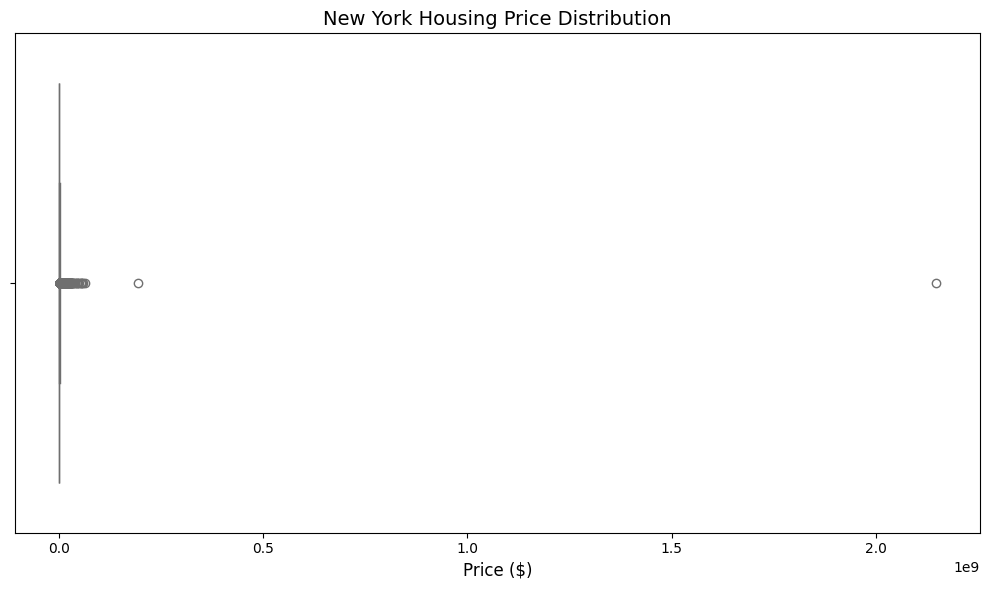

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df.price, color='skyblue')

# Add informative titles and labels
plt.title('New York Housing Price Distribution', fontsize=14)
plt.xlabel('Price ($)', fontsize=12)
plt.tight_layout()

# Display plot
plt.show()

In [20]:
# Right-skewed price distribution. Should check for error data

In [21]:
df.sort_values(by=['price'], ascending=False).head()

brokertitle                type  \
304                   Brokered by ANNE LOPA REAL ESTATE      House for sale   
1                                   Brokered by Serhant      Condo for sale   
69    Brokered by Sotheby's International Realty - E...  Townhouse for sale   
1075                                Brokered by COMPASS      Co-op for sale   
141       Brokered by Douglas Elliman - 575 Madison Ave      House for sale   

           price  beds  bath  propertysqft  \
304   2147483647     7     6  10000.000000   
1      195000000     7    10  17545.000000   
69      65000000     3     2  15200.000000   
1075    60000000     8     8   2184.207862   
141     56000000    11    10  24000.000000   

                                                address                state  \
304                                  6659-6675 Amboy Rd   New York, NY 10309   
1     Central Park Tower Penthouse-217 W 57th New Yo...   New York, NY 10019   
69                                          4 E 79th St   New York, NY 10075   
1075                                960 5th Ave Unit 12  Manhattan, NY 10075   
141                                         9 W 54th St   New York, NY 10019   

                                           main_address  \
304                6659-6675 Amboy RdNew York, NY 10309   
1     Central Park Tower Penthouse-217 W 57th New Yo...   
69                        4 E 79th StNew York, NY 10075   
1075             960 5th Ave Unit 12Manhattan, NY 10075   
141                       9 W 54th StNew York, NY 10019   

     administrative_area_level_2         locality      sublocality  \
304                United States         New York  Richmond County   
1                  United States         New York  New York County   
69                 United States         New York  New York County   
1075                    New York  New York County         New York   
141                United States         New York  New York County   

        street_name         long_name  \
304   Staten Island        Amboy Road   
1          New York  West 57th Street   
69         New York  East 79th Street   
1075      Manhattan               960   
141        New York  West 54th Street   

                                formatted_address   latitude  longitude  
304   6659 Amboy Rd, Staten Island, NY 10309, USA  40.518484 -74.224418  
1          217 W 57th St, New York, NY 10019, USA  40.766393 -73.980991  
69           4 E 79th St, New York, NY 10075, USA  40.776561 -73.963317  
1075     960 5th Ave #12, New York, NY 10075, USA  40.775642 -73.964247  
141          9 W 54th St, New York, NY 10019, USA  40.761600 -73.976191

In [ ]:
# 2147483647 is error input, should be dropped

In [22]:
df = df[df.price < df.price.max()]

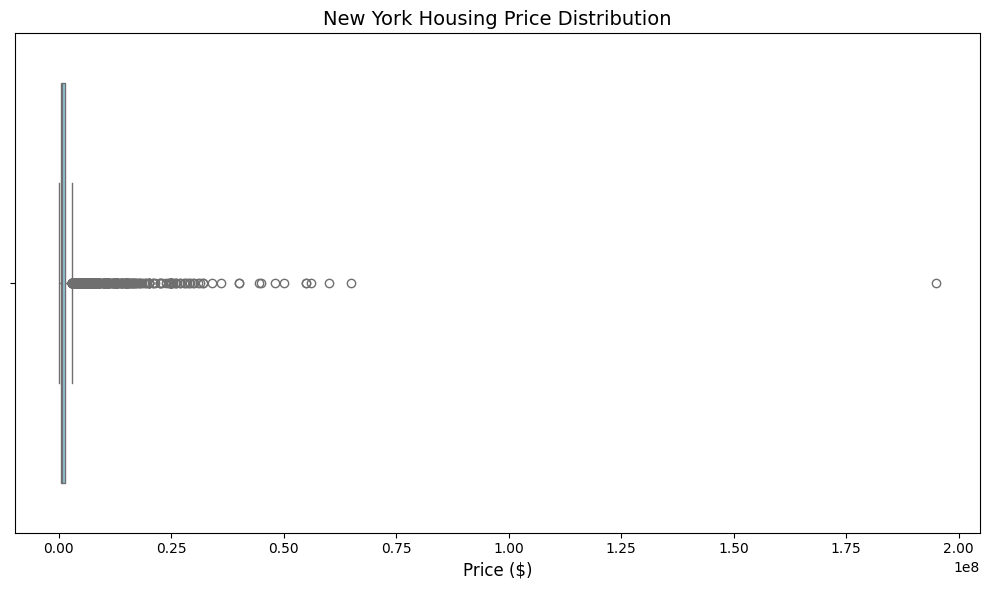

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df.price, color='skyblue')

# Add informative titles and labels
plt.title('New York Housing Price Distribution', fontsize=14)
plt.xlabel('Price ($)', fontsize=12)
plt.tight_layout()

# Display plot
plt.show()

In [26]:
# Still hava an outlier on 195000000$.I checked this property, apparently it is a very famous ultra expensive apartment.
# I will also exclude it

In [27]:
df = df[df.price < df.price.max()]

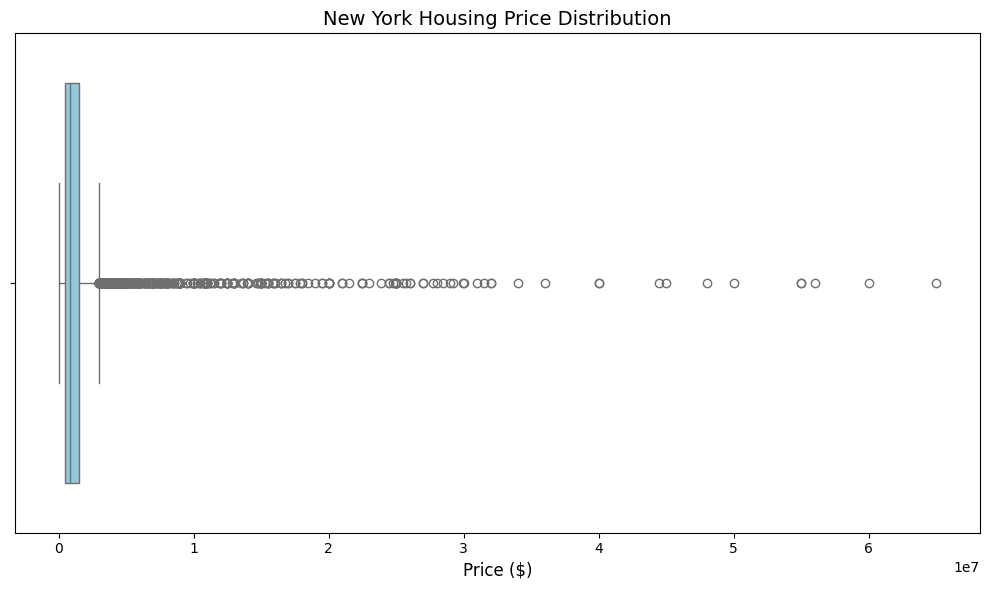

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df.price, color='skyblue')

# Add informative titles and labels
plt.title('New York Housing Price Distribution', fontsize=14)
plt.xlabel('Price ($)', fontsize=12)
plt.tight_layout()

# Display plot
plt.show()

In [29]:
# Now boxplot looks reasonable

<Axes: xlabel='price', ylabel='type'>

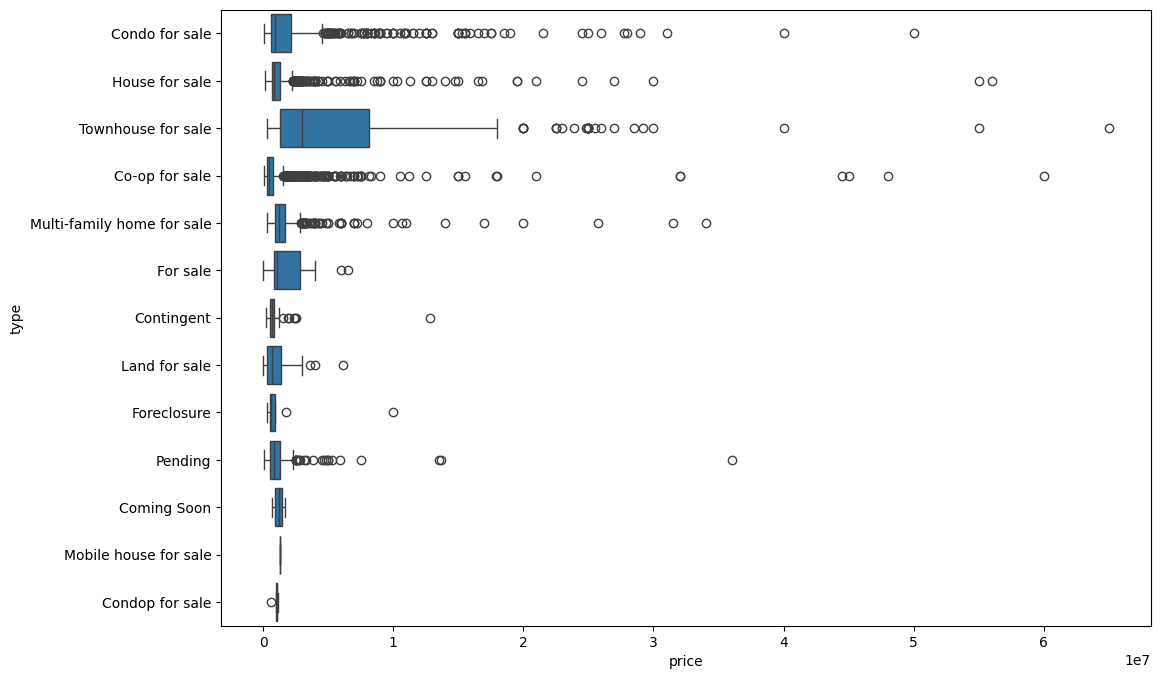

In [30]:
# Create price distribution visualization by property type
plt.figure(figsize=(12, 8))
sns.boxplot(df, x='price', y='type')

In [ ]:
# Here you can see that we have a stratification of the market, apparently townhouses are considered more as luxury real estate

In [27]:
upper_percentile_price_999 = df['price'].quantile(0.999)

In [28]:
upper_percentile_price_999

np.float64(55414000.00000067)

<Axes: ylabel='price'>

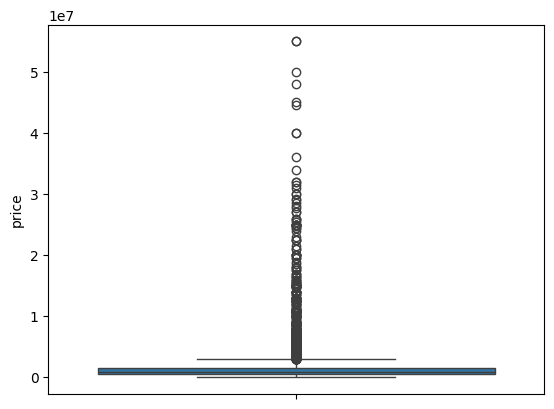

In [29]:
sns.boxplot(df.price[df.price<upper_percentile_price_999])

In [30]:
df[df.price>upper_percentile_price_999]

type       price  beds  bath  propertysqft  \
1         Condo for sale   195000000     7    10  17545.000000   
69    Townhouse for sale    65000000     3     2  15200.000000   
141       House for sale    56000000    11    10  24000.000000   
304       House for sale  2147483647     7     6  10000.000000   
1075      Co-op for sale    60000000     8     8   2184.207862   

             locality    street_name  \
1            New York       New York   
69           New York       New York   
141          New York       New York   
304          New York  Staten Island   
1075  New York County      Manhattan   

                                formatted_address   latitude  longitude  
1          217 W 57th St, New York, NY 10019, USA  40.766393 -73.980991  
69           4 E 79th St, New York, NY 10075, USA  40.776561 -73.963317  
141          9 W 54th St, New York, NY 10019, USA  40.761600 -73.976191  
304   6659 Amboy Rd, Staten Island, NY 10309, USA  40.518484 -74.224418  
1075     960 5th Ave #12, New York, NY 10075, USA  40.775642 -73.964247

<Axes: ylabel='price'>

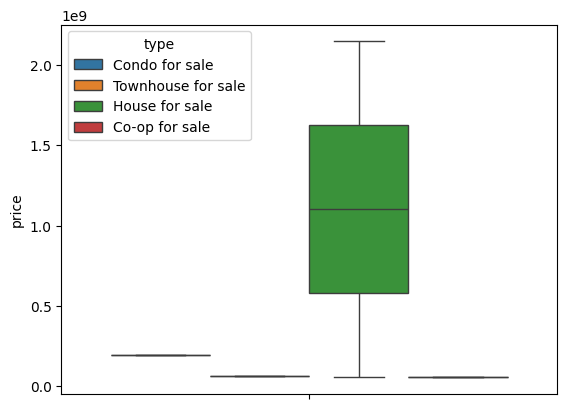

In [31]:
sns.boxplot(df[df.price>upper_percentile_price_999], y='price', hue='type')

In [32]:
# The item with max price is just ordinary home in Staten Island. Delete it as it most likely is mistake
df.drop([304], inplace=True)

In [33]:
df.price.max()

np.int64(195000000)

<Axes: ylabel='price'>

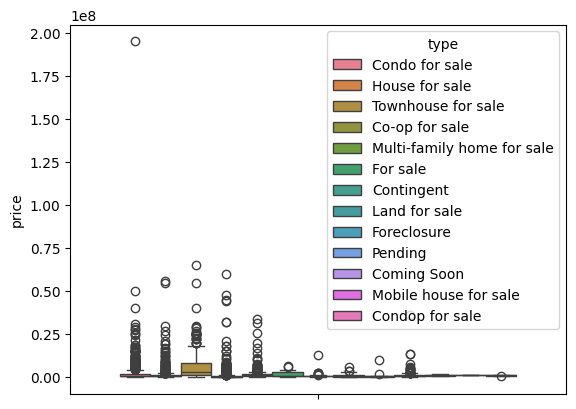

In [34]:
sns.boxplot(df, y='price', hue='type')

<Axes: ylabel='propertysqft'>

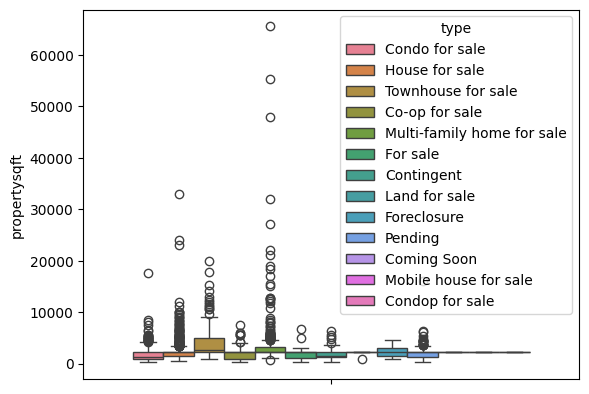

In [32]:
sns.boxplot(df, y='propertysqft', hue='type')

In [35]:
# Check max price condo, and it's more status thing. Should also be excluded
df.drop([1], inplace=True)

<Axes: ylabel='price'>

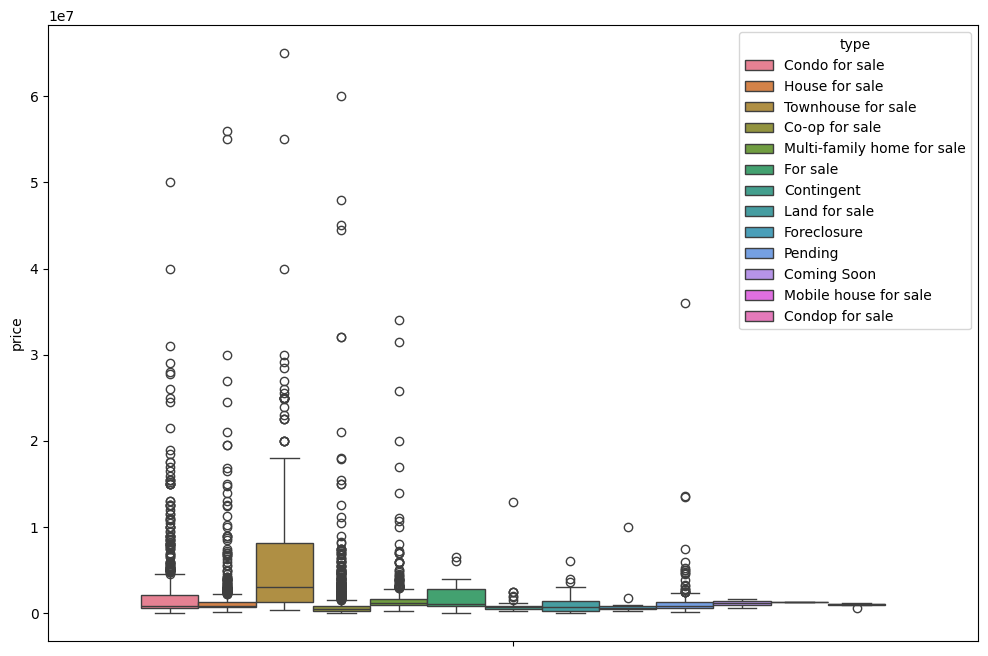

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(df, y='price', hue='type')

<Axes: xlabel='price', ylabel='type'>

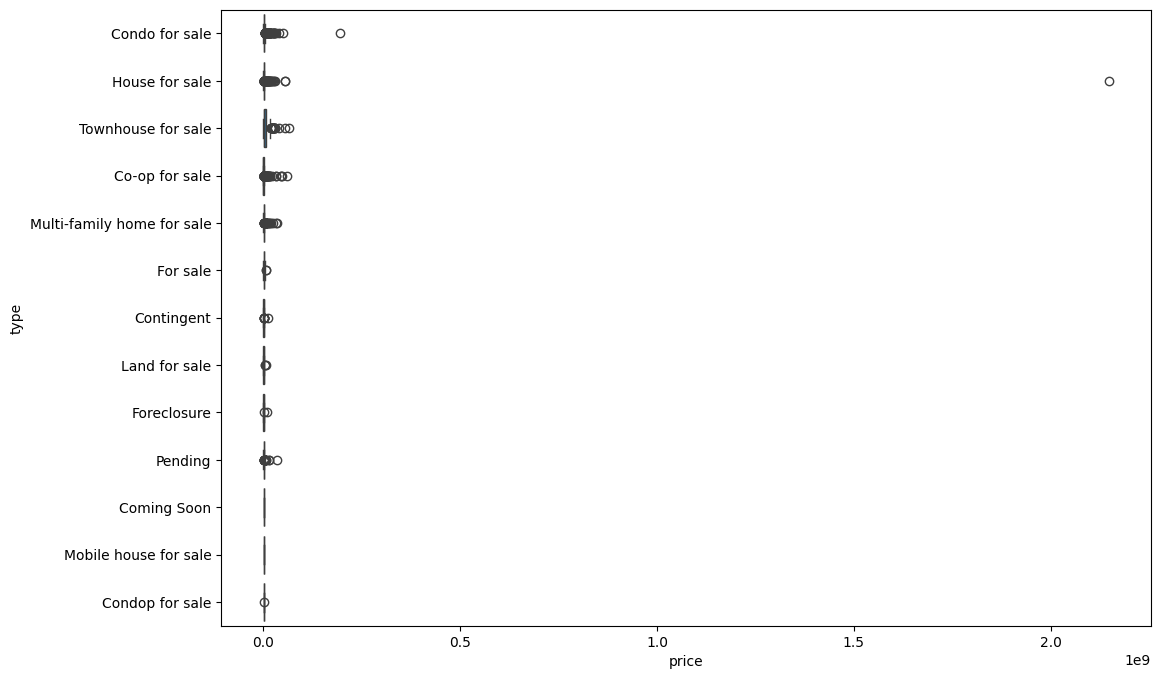

In [38]:
plt.figure(figsize=(12, 8))
sns.boxplot(df, x='price', y='type')

<Axes: xlabel='price', ylabel='Count'>

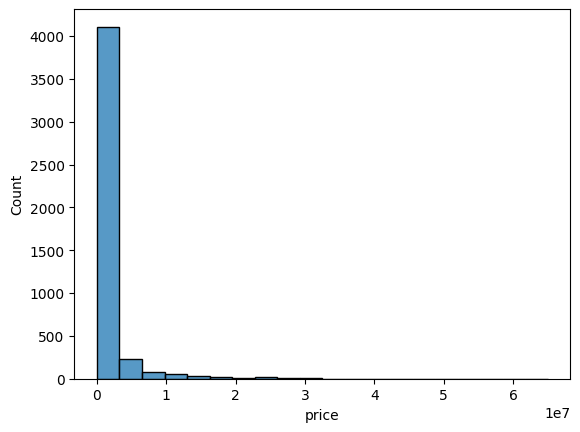

In [37]:
sns.histplot(df.price, bins=20)

In [38]:
df.price.describe().apply(lambda x: format(x, 'f'))

count        4585.000000
mean      1871308.802617
std       4081826.558273
min          2494.000000
25%        499000.000000
50%        825000.000000
75%       1495000.000000
max      65000000.000000
Name: price, dtype: object

In [39]:
df['log_price'] = np.log(df['price'])

<Axes: xlabel='log_price', ylabel='Count'>

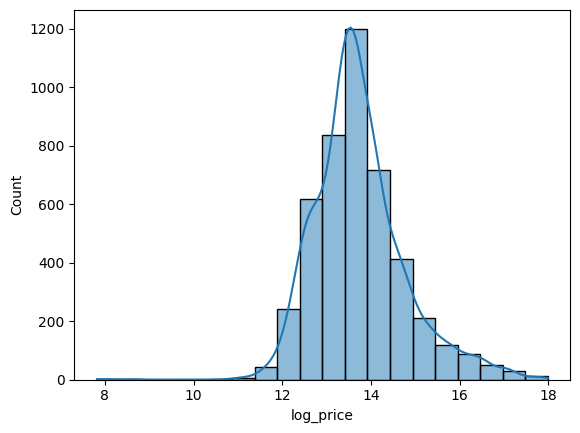

In [40]:
sns.histplot(df['log_price'], bins=20, kde=True)

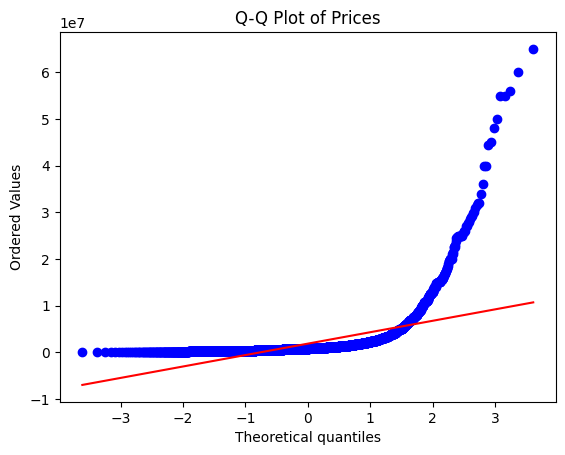

In [41]:
from scipy.stats import probplot

# Create a Q-Q plot
probplot(df['price'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Prices")
plt.show()

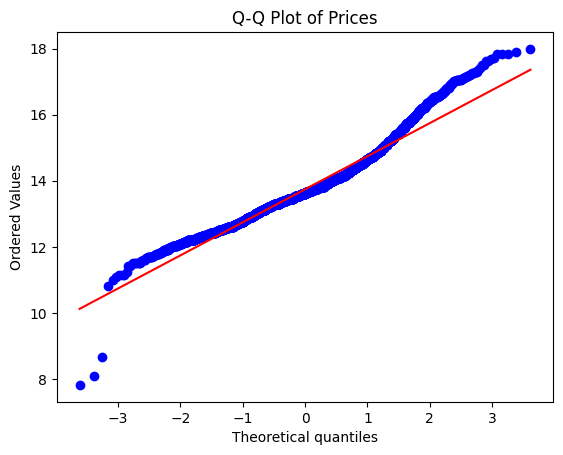

In [42]:
probplot(df['log_price'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Prices")
plt.show()

In [43]:
df.sort_values(by='price').head(10)

type  price  beds  bath  propertysqft         locality  \
317         For sale   2494     2     1   2184.207862  New York County   
310         For sale   3225     3     1   2184.207862  New York County   
360    Land for sale   5800     3     2   2184.207862     Kings County   
463   Co-op for sale  49500     3     2    800.000000     Bronx County   
979   Condo for sale  60000     3     1    445.000000  New York County   
188         For sale  65000     3     1    230.000000  New York County   
3     Condo for sale  69000     3     1    445.000000         New York   
252   Co-op for sale  69000     1     1    850.000000     Bronx County   
132   Co-op for sale  69900     2     1    700.000000         New York   
4003   Land for sale  75000     3     2   2184.207862    United States   

        street_name                              formatted_address   latitude  \
317       Manhattan    635 W 170th St #4f, New York, NY 10032, USA  40.843406   
310       Manhattan    635 W 170th St #2c, New York, NY 10032, USA  40.843406   
360       Flatlands      4515 Avenue N #5, Brooklyn, NY 11234, USA  40.618915   
463     City Island  150 City Island Ave #3e, Bronx, NY 10464, USA  40.843284   
979       Manhattan    2 E 55th St 809 35, New York, NY 10022, USA  40.761398   
188       Manhattan      45 Madison St #1, New York, NY 10038, USA  40.712070   
3          New York           2 E 55th St, New York, NY 10022, USA  40.761398   
252      Highbridge    1185 Anderson Ave #2e, Bronx, NY 10452, USA  40.836662   
132       The Bronx        61 Edgewater Park, Bronx, NY 10465, USA  40.822499   
4003  Queens County               199th St, Jamaica, NY 11412, USA  40.694216   

      longitude  log_price  
317  -73.940795   7.821643  
310  -73.940795   8.078688  
360  -73.931211   8.665613  
463  -73.784603  10.809728  
979  -73.974613  11.002100  
188  -73.998326  11.082143  
3    -73.974613  11.141862  
252  -73.923959  11.141862  
132  -73.811157  11.154821  
4003 -73.753090  11.225243

In [44]:
df = df[df['price'] >= 49500]

In [45]:
df.sort_values(by='price').head()

type  price  beds  bath  propertysqft         locality  \
463  Co-op for sale  49500     3     2         800.0     Bronx County   
979  Condo for sale  60000     3     1         445.0  New York County   
188        For sale  65000     3     1         230.0  New York County   
252  Co-op for sale  69000     1     1         850.0     Bronx County   
3    Condo for sale  69000     3     1         445.0         New York   

     street_name                              formatted_address   latitude  \
463  City Island  150 City Island Ave #3e, Bronx, NY 10464, USA  40.843284   
979    Manhattan    2 E 55th St 809 35, New York, NY 10022, USA  40.761398   
188    Manhattan      45 Madison St #1, New York, NY 10038, USA  40.712070   
252   Highbridge    1185 Anderson Ave #2e, Bronx, NY 10452, USA  40.836662   
3       New York           2 E 55th St, New York, NY 10022, USA  40.761398   

     longitude  log_price  
463 -73.784603  10.809728  
979 -73.974613  11.002100  
188 -73.998326  11.082143  
252 -73.923959  11.141862  
3   -73.974613  11.141862

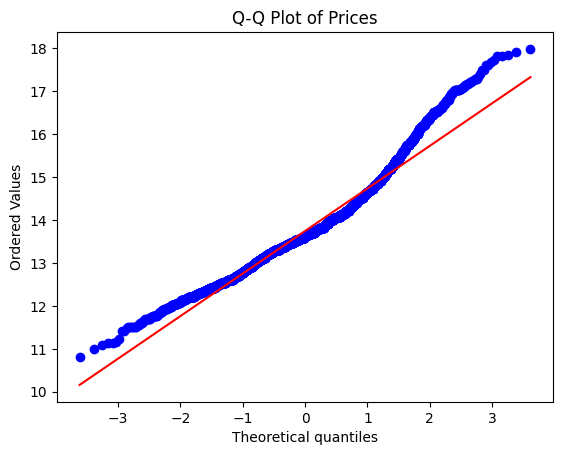

In [46]:
probplot(df['log_price'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Prices")
plt.show()

In [47]:
df.type.unique()

array(['Condo for sale', 'House for sale', 'Townhouse for sale',
       'Co-op for sale', 'Multi-family home for sale', 'For sale',
       'Contingent', 'Land for sale', 'Foreclosure', 'Pending',
       'Coming Soon', 'Mobile house for sale', 'Condop for sale'],
      dtype=object)

In [48]:
ub = []
for column in df.type.unique():
    c = df[df.type == column].price
    Q1 = np.percentile(c, 25)
    Q3 = np.percentile(c, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    ub.append(upper_bound)
ub

[np.float64(4512500.0),
 np.float64(2236500.0),
 np.float64(18341125.0),
 np.float64(1546500.0),
 np.float64(2871500.0),
 np.float64(6226125.0),
 np.float64(1411875.0),
 np.float64(3059625.0),
 np.float64(1436271.875),
 np.float64(2300000.0),
 np.float64(2218000.0),
 np.float64(1288000.0),
 np.float64(1305750.0)]

In [49]:
upper = pd.DataFrame({'column': df.type.unique(), 'upper_bound': ub})

In [50]:
upper

column   upper_bound
0               Condo for sale  4.512500e+06
1               House for sale  2.236500e+06
2           Townhouse for sale  1.834112e+07
3               Co-op for sale  1.546500e+06
4   Multi-family home for sale  2.871500e+06
5                     For sale  6.226125e+06
6                   Contingent  1.411875e+06
7                Land for sale  3.059625e+06
8                  Foreclosure  1.436272e+06
9                      Pending  2.300000e+06
10                 Coming Soon  2.218000e+06
11       Mobile house for sale  1.288000e+06
12             Condop for sale  1.305750e+06

In [51]:
limiter = upper.iloc[0,1]

In [52]:
limiter

np.float64(4512500.0)

In [53]:
upper.describe()

upper_bound
count  1.300000e+01
mean   3.750290e+06
std    4.612605e+06
min    1.288000e+06
25%    1.436272e+06
50%    2.236500e+06
75%    3.059625e+06
max    1.834112e+07

In [54]:
df['is_upper'] = np.where(df.price>=limiter, 1, 0)

In [55]:
df_upper = df[df.is_upper==1]
df_lower = df[df.is_upper==0]

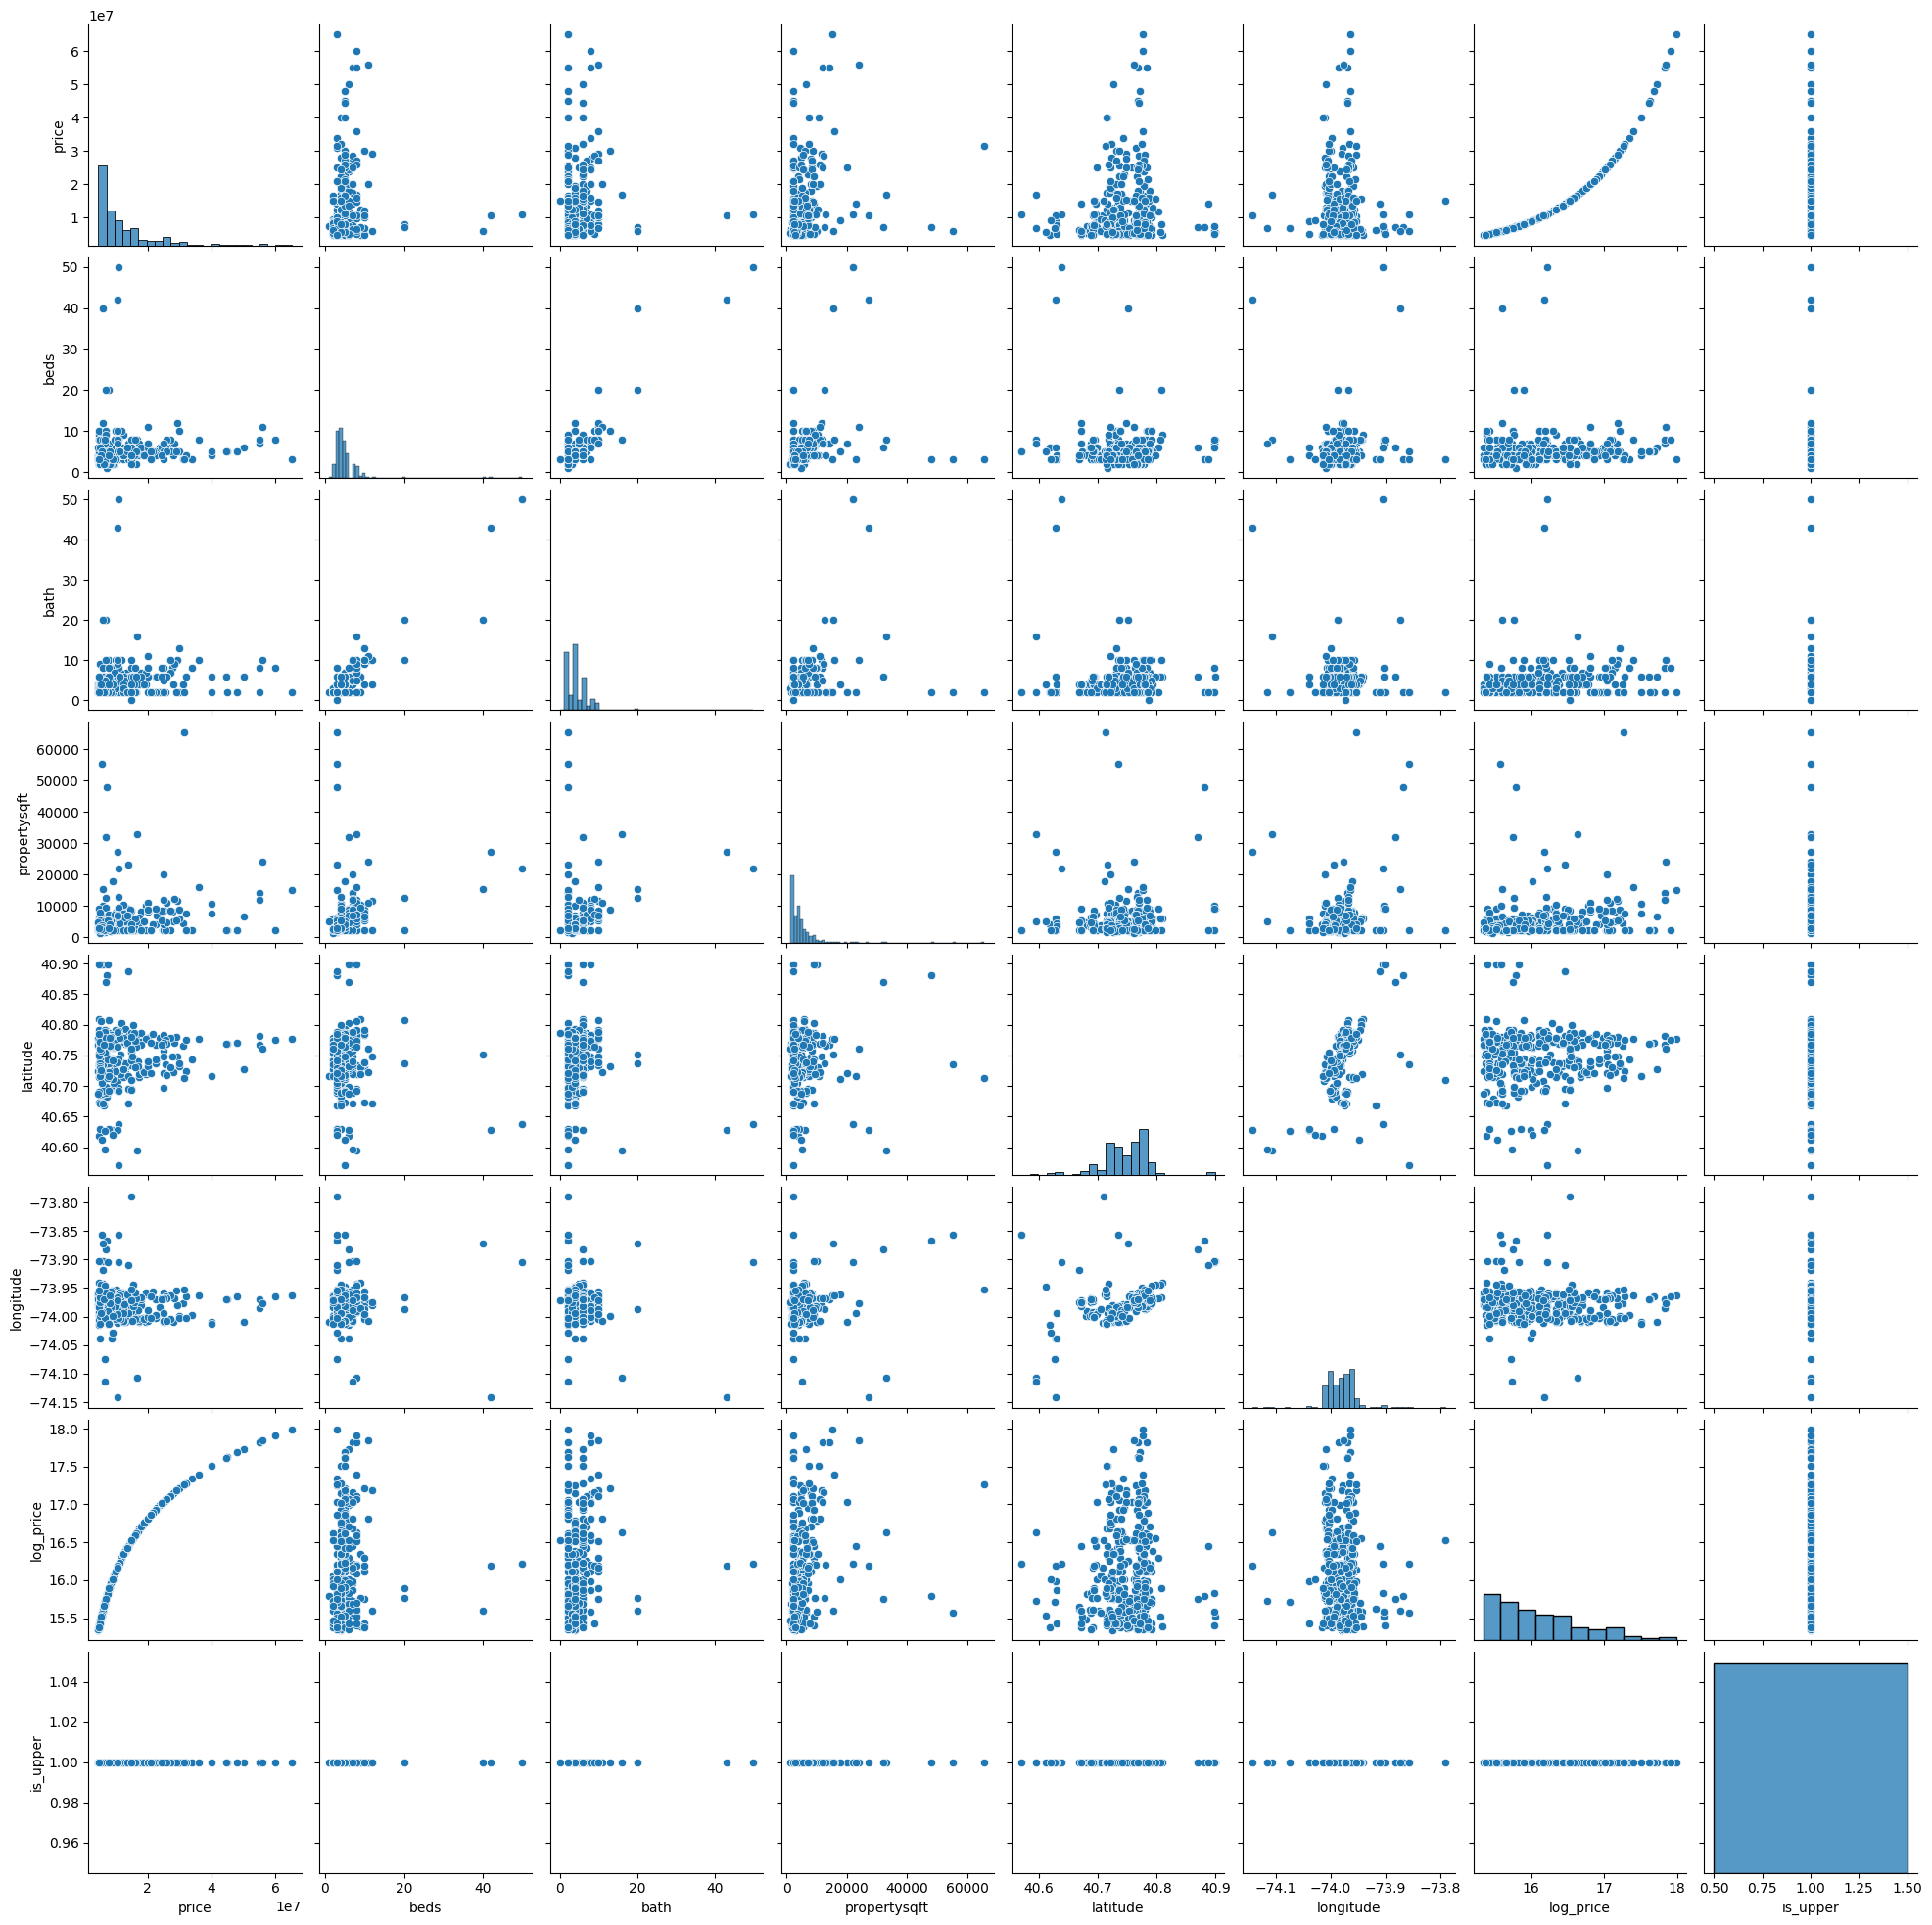

In [56]:
sns.pairplot(df_upper)

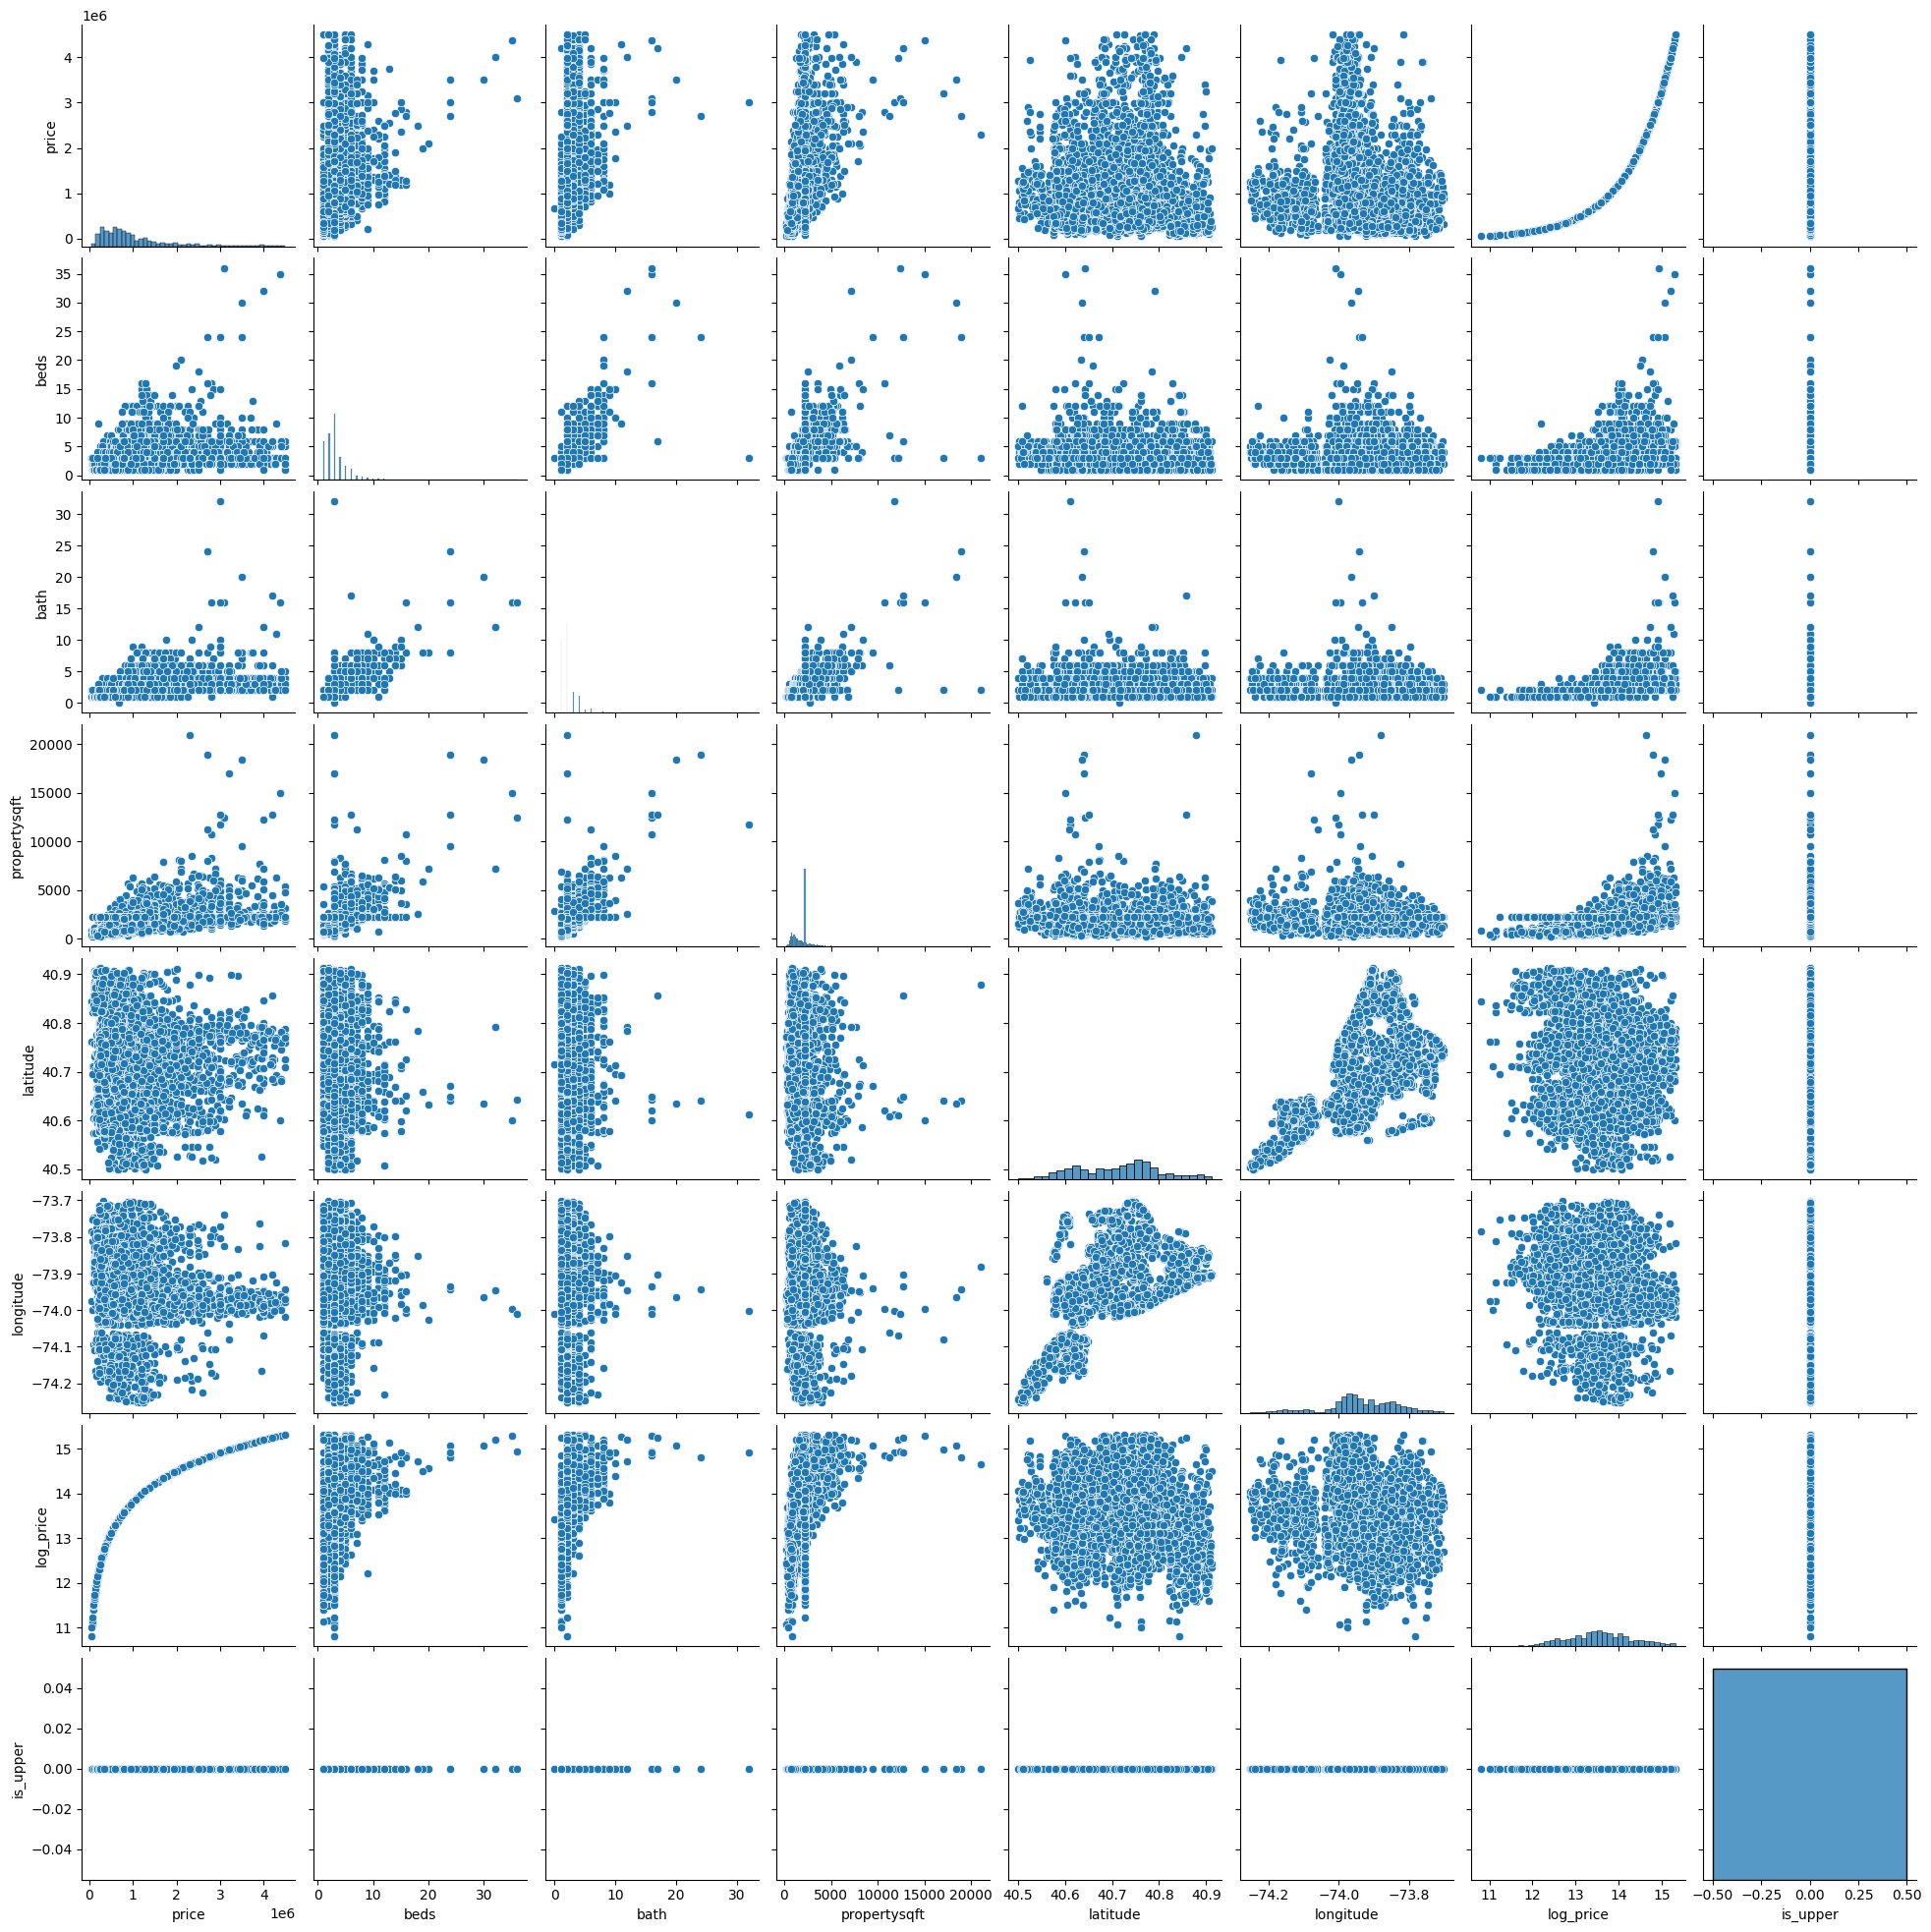

In [57]:
sns.pairplot(df_lower)

<Axes: xlabel='latitude', ylabel='longitude'>

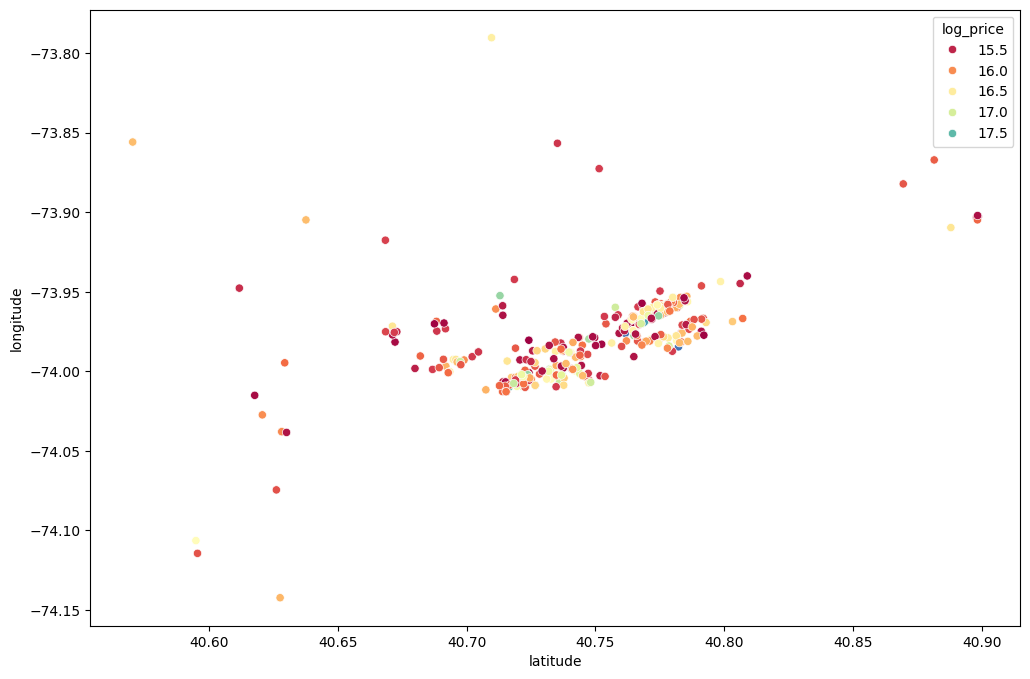

In [58]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="latitude", y="longitude", hue="log_price", data=df_upper, palette="Spectral")

## Other variables distribution

In [59]:
df.columns

Index(['type', 'price', 'beds', 'bath', 'propertysqft', 'locality',
       'street_name', 'formatted_address', 'latitude', 'longitude',
       'log_price', 'is_upper'],
      dtype='object')

### Beds

<Axes: xlabel='beds', ylabel='Count'>

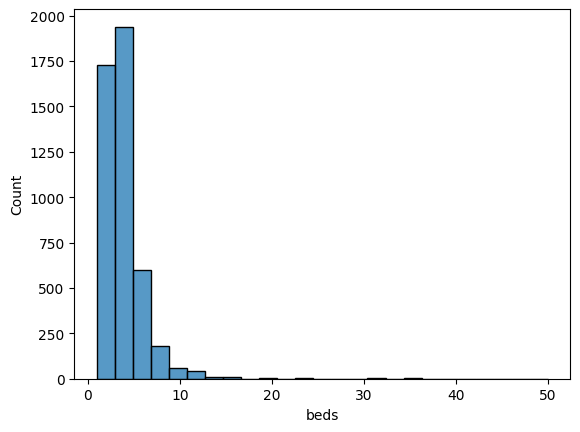

In [60]:
sns.histplot(df.beds, bins=25)

In [61]:
df.beds.describe()

count    4582.000000
mean        3.364688
std         2.629057
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        50.000000
Name: beds, dtype: float64

<Axes: ylabel='beds'>

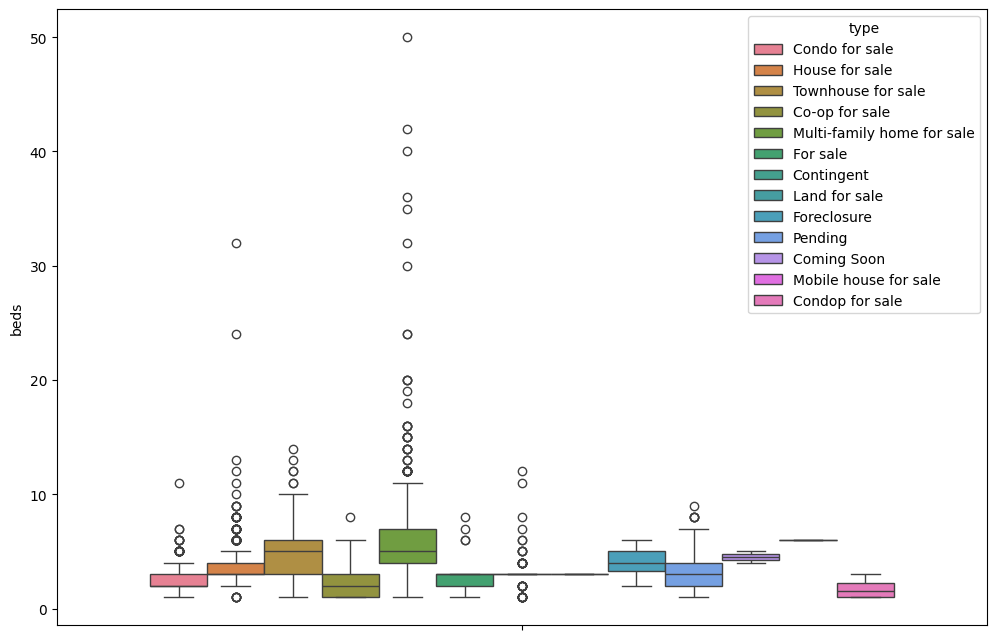

In [62]:
plt.figure(figsize=(12, 8))
sns.boxplot(df,y='beds', hue='type')

In [63]:
df['log_beds'] = np.log(df.beds)

<Axes: xlabel='log_beds', ylabel='Count'>

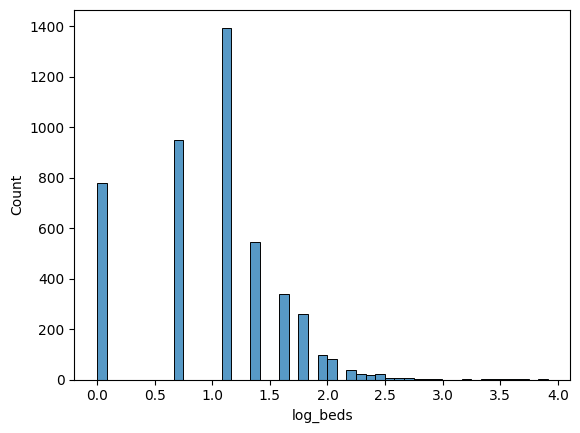

In [64]:
sns.histplot(df.log_beds)

<Axes: ylabel='log_beds'>

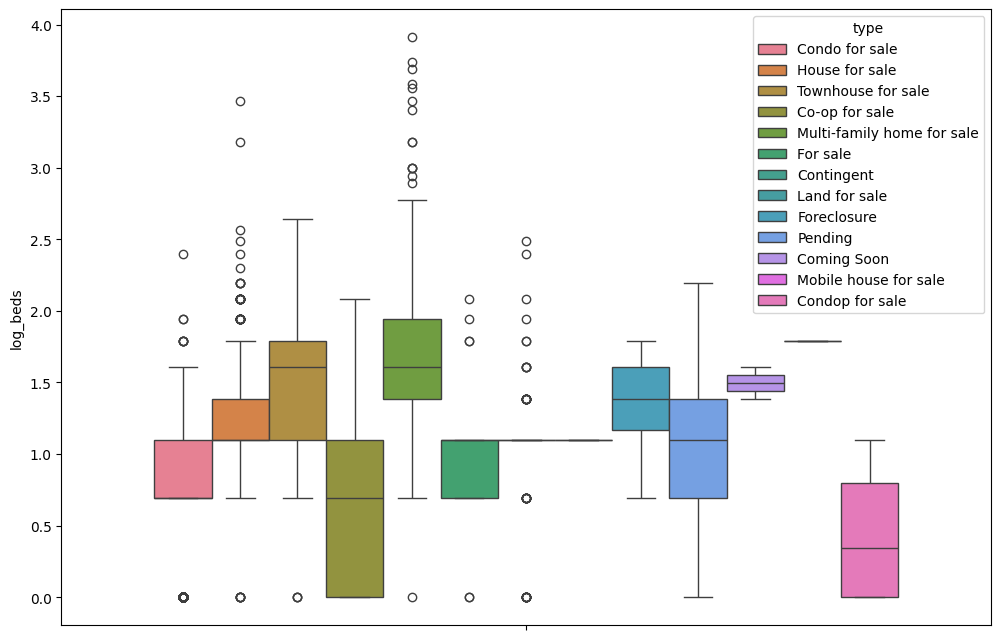

In [65]:
plt.figure(figsize=(12, 8))
sns.boxplot(df,y='log_beds', hue='type')

### Bath

<Axes: xlabel='bath', ylabel='Count'>

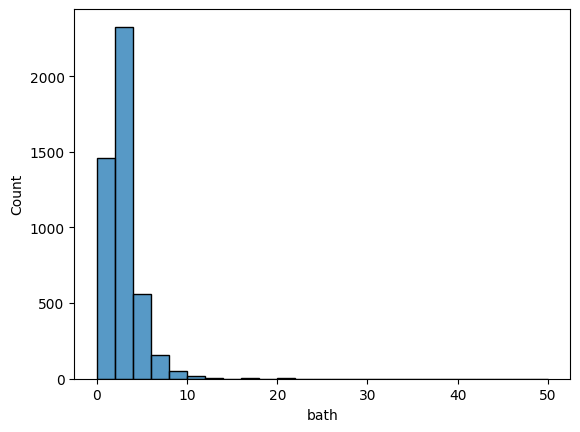

In [66]:
sns.histplot(df.bath, bins=25)

In [67]:
df.bath.describe()

count    4582.000000
mean        2.352466
std         1.967525
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        50.000000
Name: bath, dtype: float64

<Axes: ylabel='bath'>

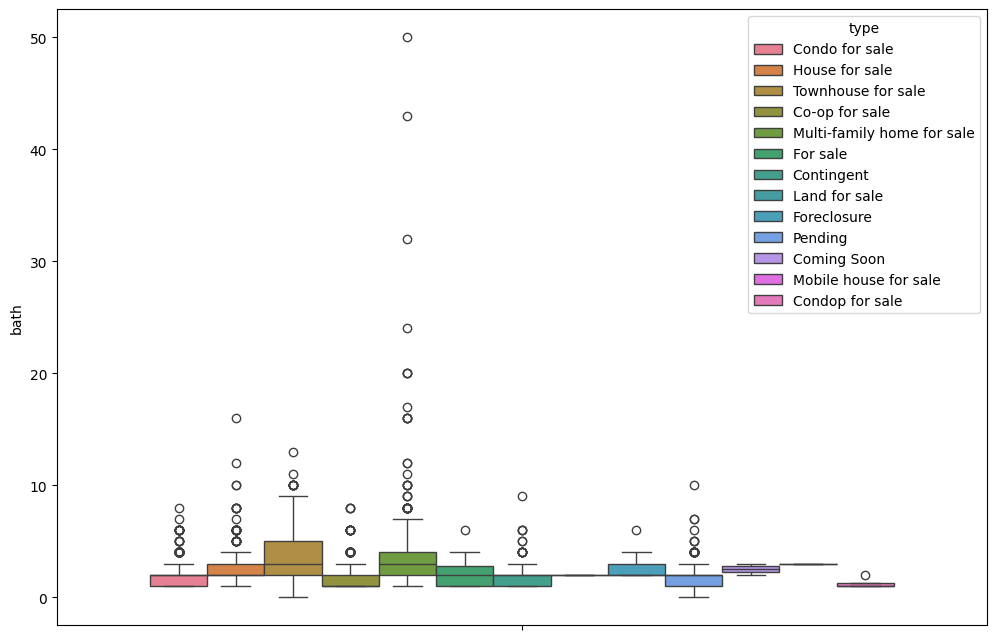

In [68]:
plt.figure(figsize=(12, 8))
sns.boxplot(df,y='bath', hue='type')

In [69]:
df['log1_bath'] = np.log(df.bath+1)

<Axes: ylabel='log1_bath'>

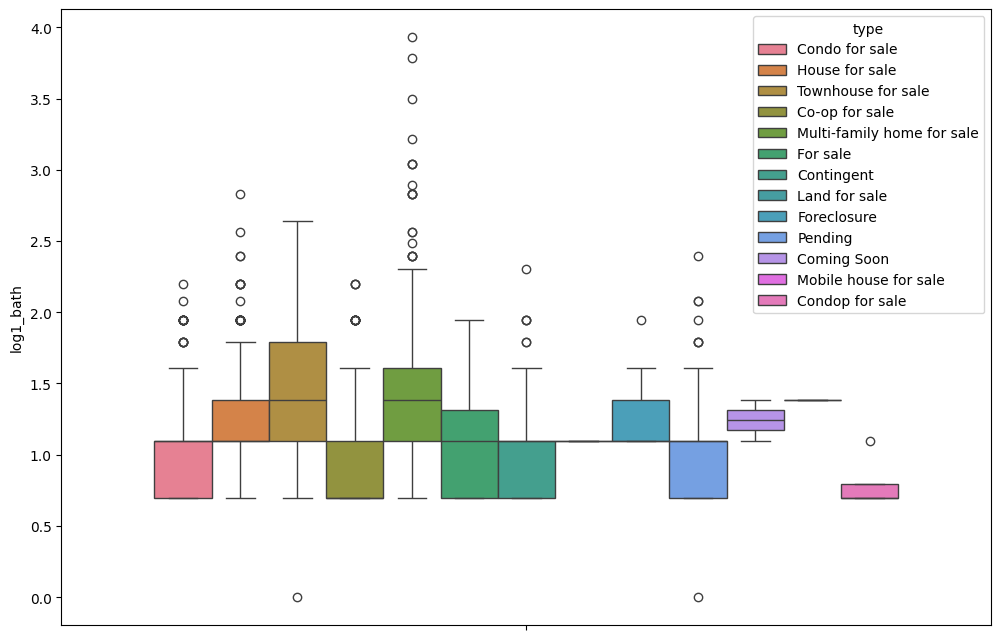

In [70]:
plt.figure(figsize=(12, 8))
sns.boxplot(df,y='log1_bath', hue='type')

### *Propertysqft*

<Axes: xlabel='propertysqft', ylabel='Count'>

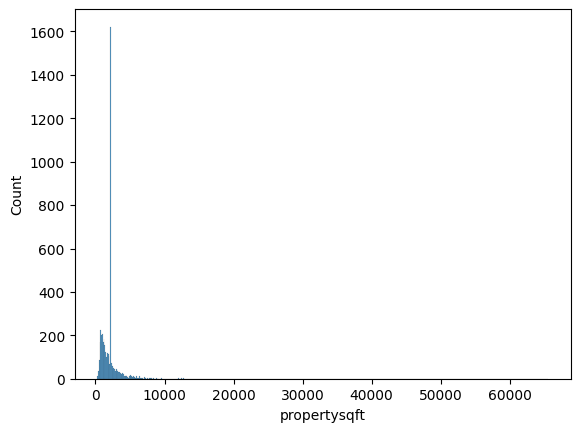

In [71]:
sns.histplot(df.propertysqft)

In [72]:
df.propertysqft.value_counts()

propertysqft
2184.207862     1536
800.000000        54
900.000000        51
750.000000        51
1200.000000       48
                ... 
2002.000000        1
2090.000000        1
886.000000         1
2367.000000        1
12733.000000       1
Name: count, Length: 1444, dtype: int64

In [73]:
df.propertysqft.describe()

count     4582.000000
mean      2172.647158
std       2270.083992
min        230.000000
25%       1200.000000
50%       2184.207862
75%       2184.207862
max      65535.000000
Name: propertysqft, dtype: float64

In [74]:
df[df.propertysqft!=2184.207862].propertysqft.describe()

count     3046.000000
mean      2166.817466
std       2784.361263
min        230.000000
25%        953.500000
50%       1495.500000
75%       2455.000000
max      65535.000000
Name: propertysqft, dtype: float64

In [75]:
df['area_missing'] = np.where(df['propertysqft'] == 2184.207862, 1, 0)

In [76]:
df['area_missing'].value_counts()

area_missing
0    3046
1    1536
Name: count, dtype: int64

In [77]:
df['propertysqft'] = np.where(df['area_missing'] == 1, 1495.512345, df['propertysqft'])

In [78]:
df.propertysqft.describe()

count     4582.000000
mean      1941.779346
std       2292.087025
min        230.000000
25%       1200.000000
50%       1495.512345
75%       1887.750000
max      65535.000000
Name: propertysqft, dtype: float64

<Axes: ylabel='propertysqft'>

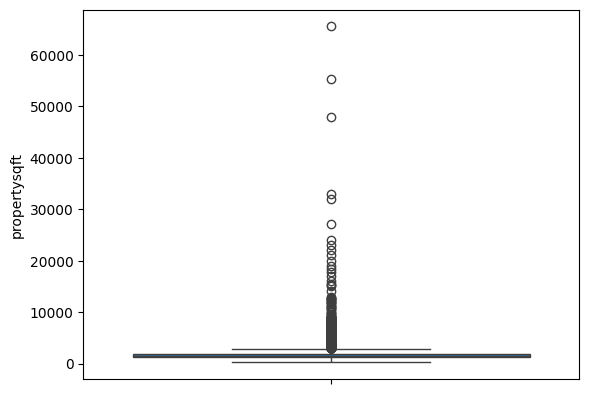

In [79]:
sns.boxplot(df.propertysqft)

In [80]:
df['log_area'] = np.log(df.propertysqft)

<Axes: xlabel='log_area', ylabel='Count'>

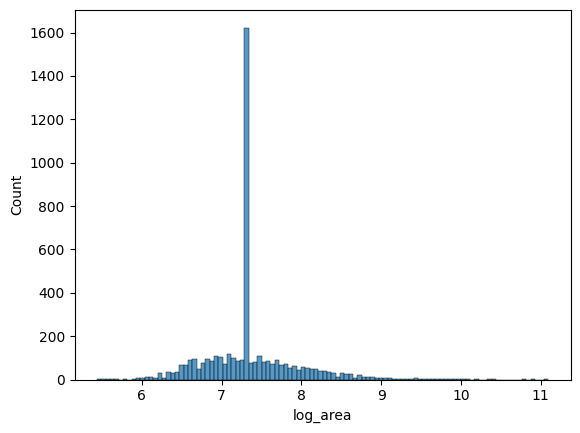

In [81]:
sns.histplot(df.log_area)

In [82]:
df = df.drop(df[df.propertysqft>40000].index)

<Axes: ylabel='propertysqft'>

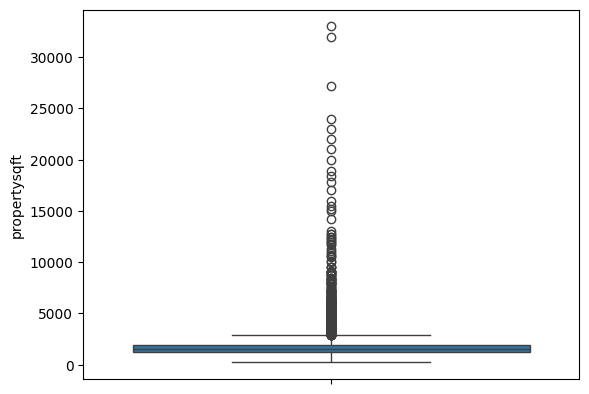

In [83]:
sns.boxplot(df.propertysqft)

### *Type*

<Axes: xlabel='count', ylabel='type'>

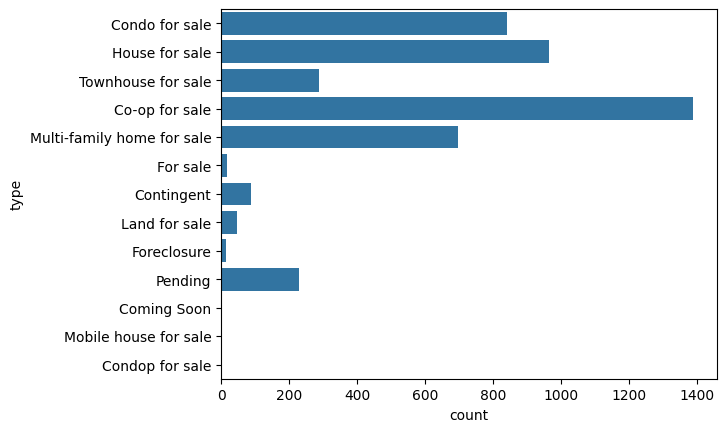

In [84]:
sns.countplot(df.type)

In [85]:
df.type.value_counts()

type
Co-op for sale                1388
House for sale                 965
Condo for sale                 841
Multi-family home for sale     696
Townhouse for sale             288
Pending                        229
Contingent                      87
Land for sale                   46
For sale                        18
Foreclosure                     14
Condop for sale                  4
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64

In [86]:
df = df.reset_index(drop=True)

In [87]:
df_backup2 = df.copy()

## Correlation

In [88]:
df.columns

Index(['type', 'price', 'beds', 'bath', 'propertysqft', 'locality',
       'street_name', 'formatted_address', 'latitude', 'longitude',
       'log_price', 'is_upper', 'log_beds', 'log1_bath', 'area_missing',
       'log_area'],
      dtype='object')

In [89]:
numerical_columns = ['price', 'beds', 'bath', 'propertysqft', 'log_price', 'log_area', 'log_beds', 'log1_bath']

In [90]:
corr = df[numerical_columns].corr()

<Axes: >

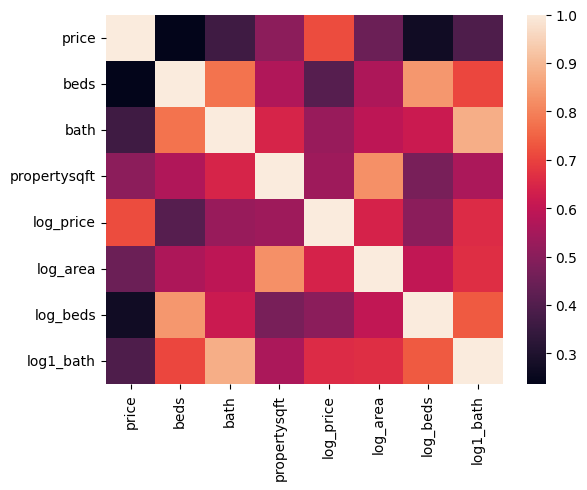

In [91]:
sns.heatmap(corr)

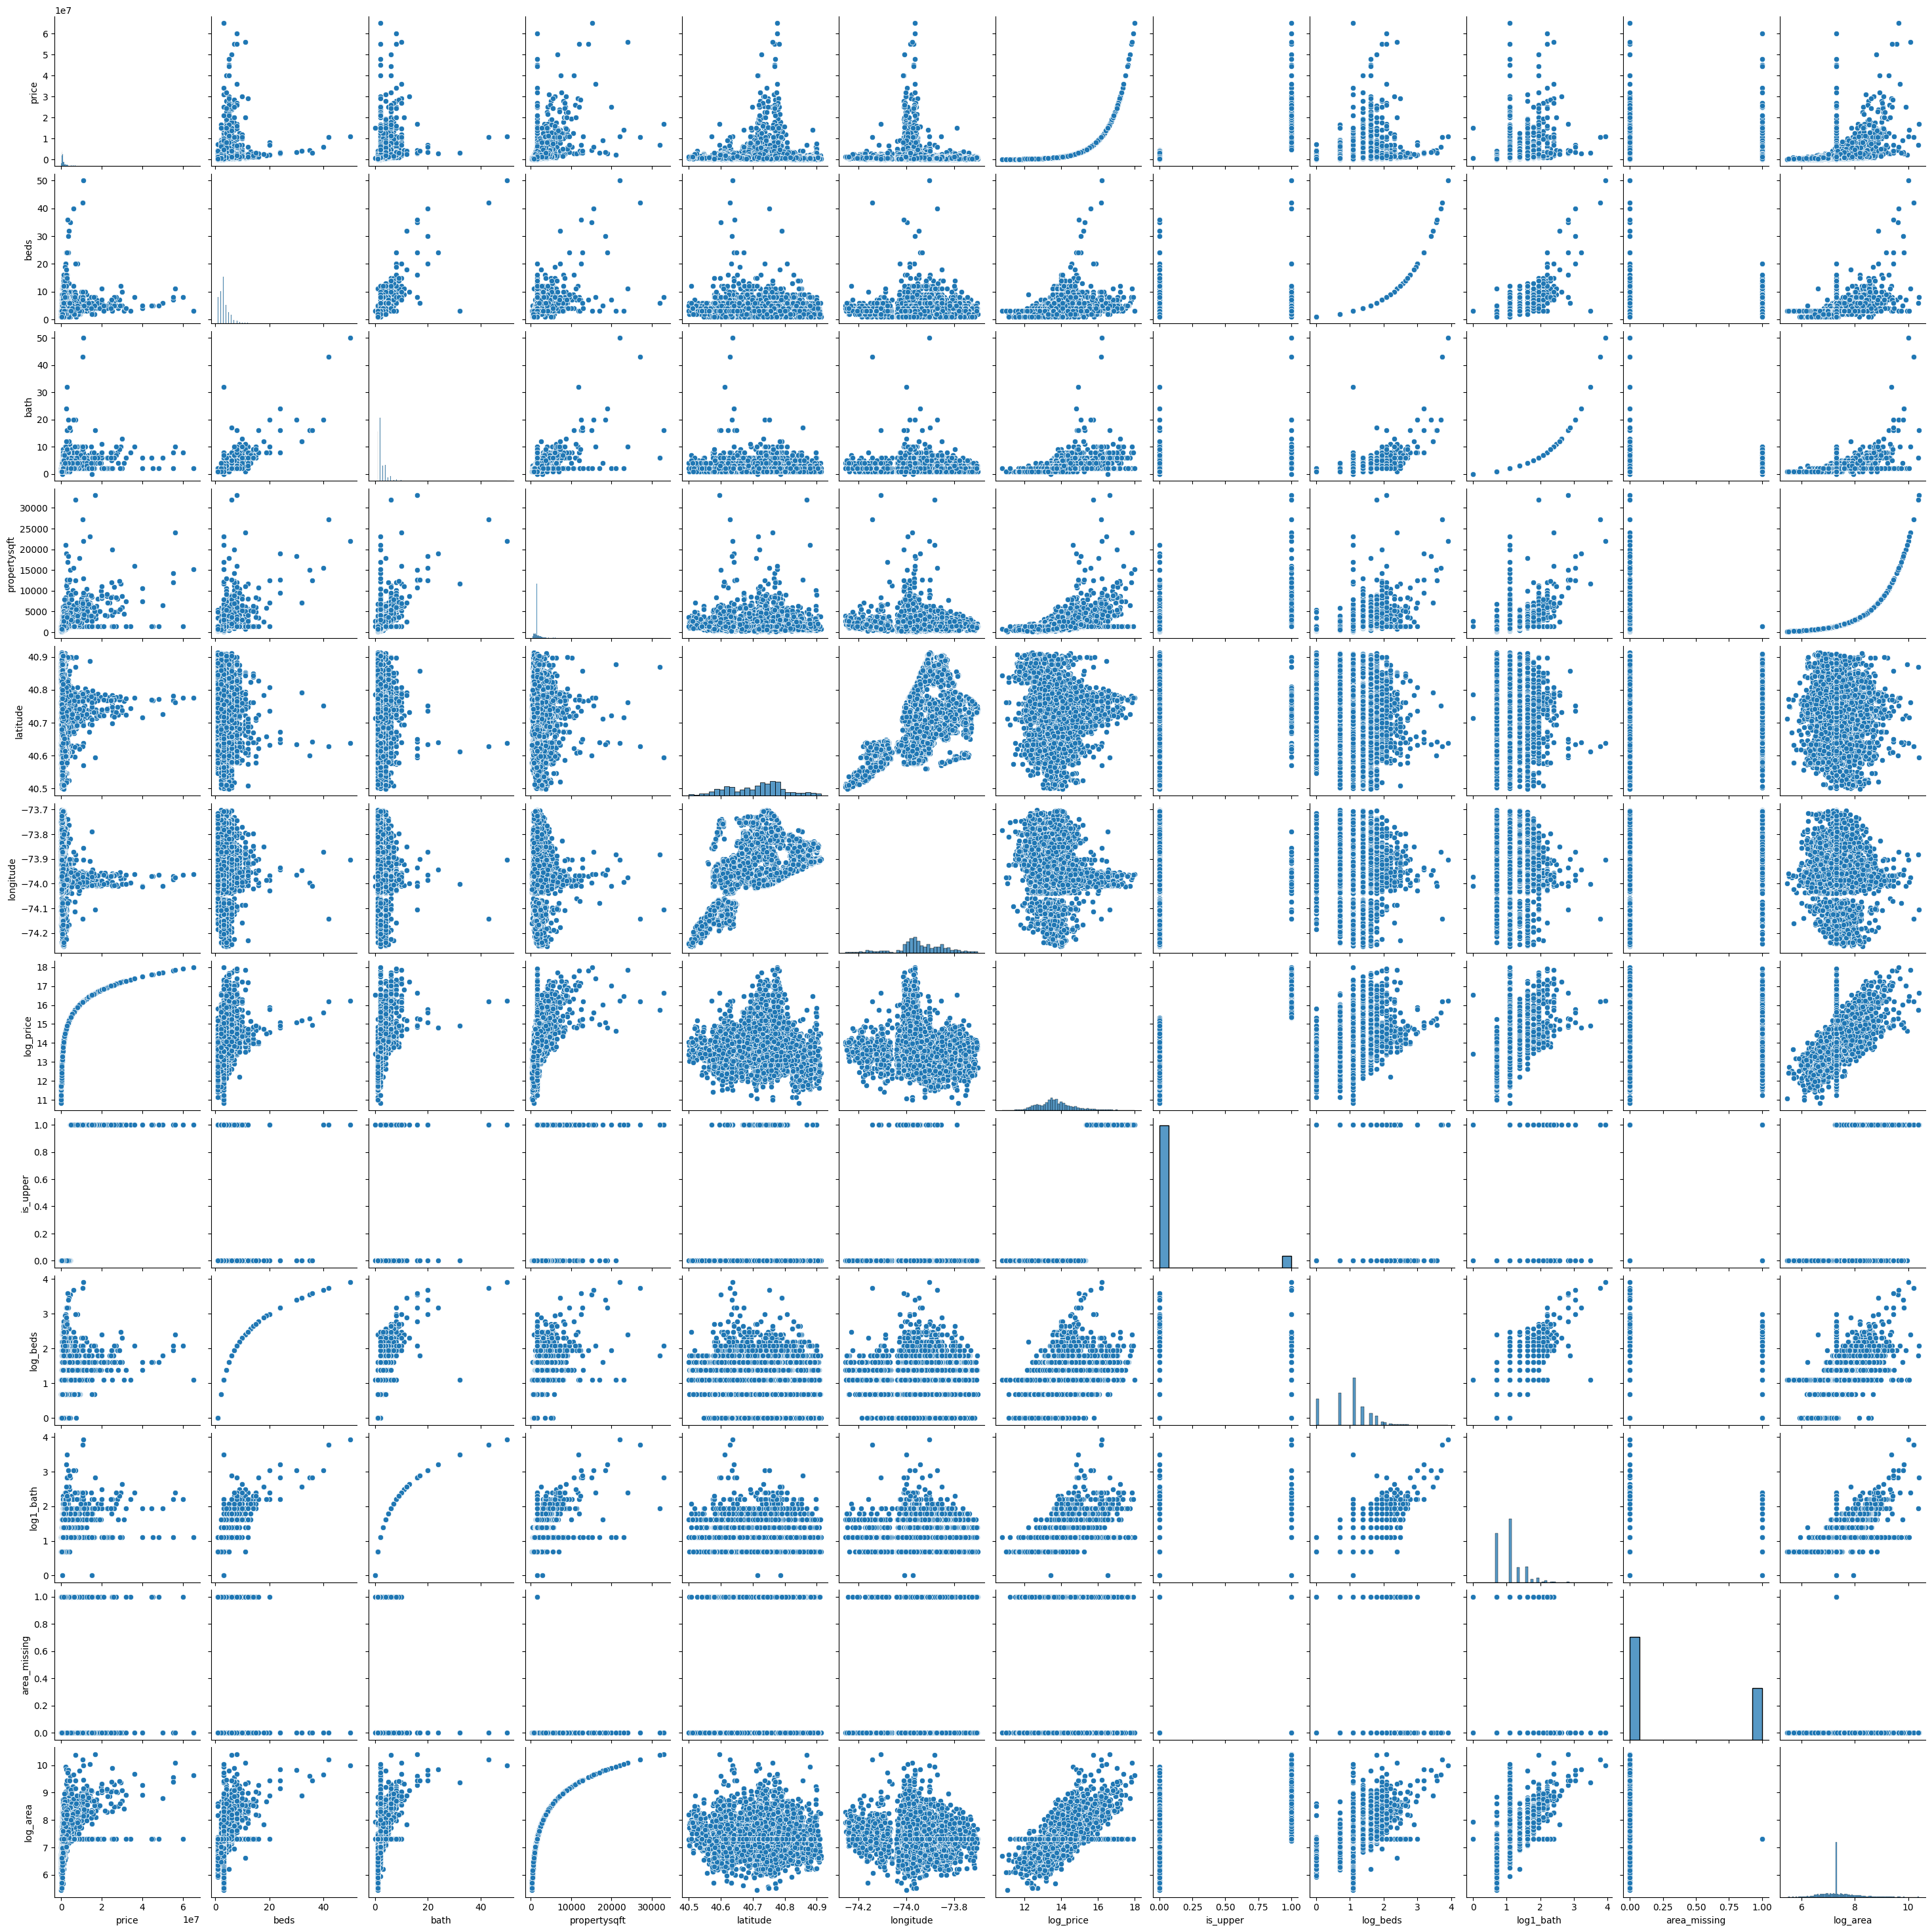

In [92]:
sns.pairplot(df)

## Spatial distribution

In [39]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="longitude", y="latitude", hue="log_price", data=df, palette="Spectral")

ValueError: Could not interpret value `log_price` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='latitude', ylabel='longitude'>

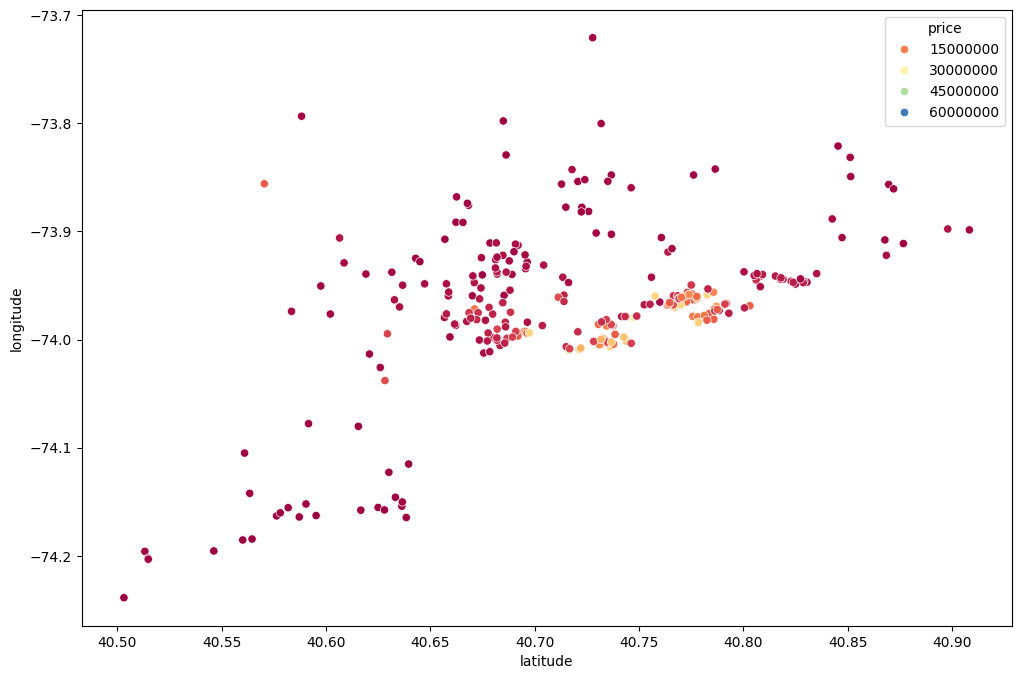

In [36]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="latitude", y="longitude", hue="price", data=df[df.type=='Townhouse for sale'], palette="Spectral")

<Axes: xlabel='latitude', ylabel='longitude'>

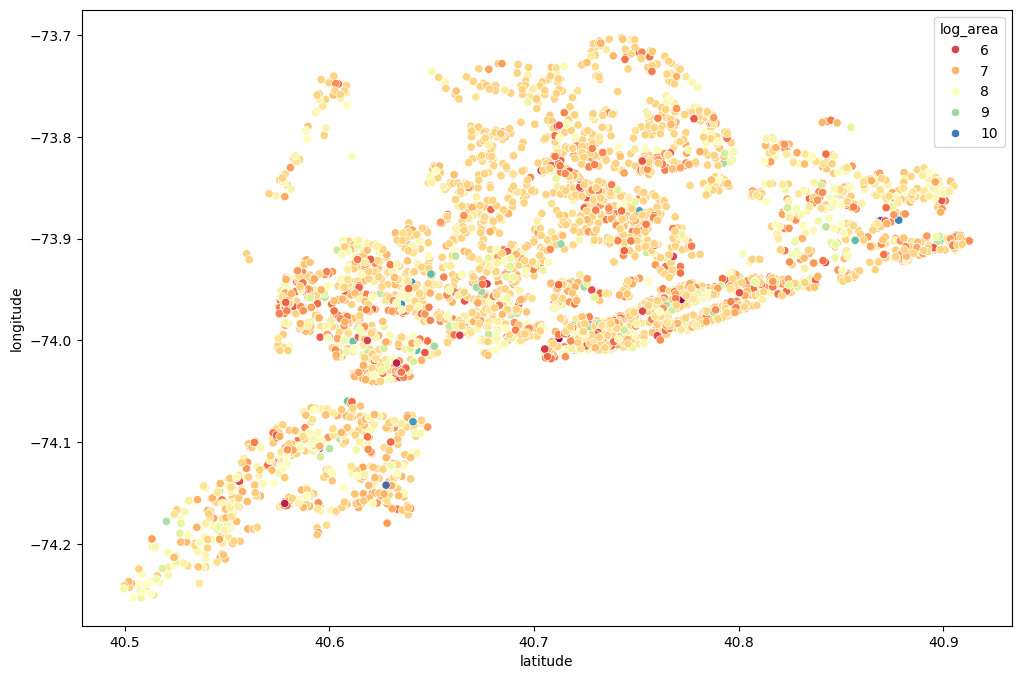

In [94]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="latitude", y="longitude", hue="log_area", data=df, palette="Spectral")

<Axes: xlabel='latitude', ylabel='longitude'>

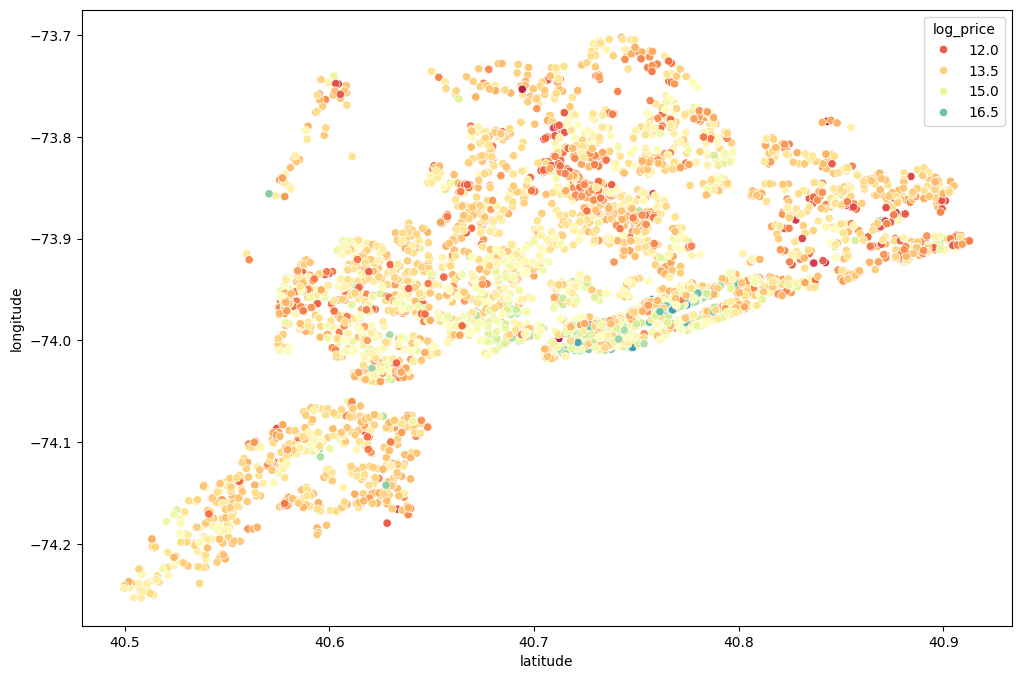

In [95]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="latitude", y="longitude", hue="log_price", data=df, palette="Spectral")

<Axes: xlabel='latitude', ylabel='longitude'>

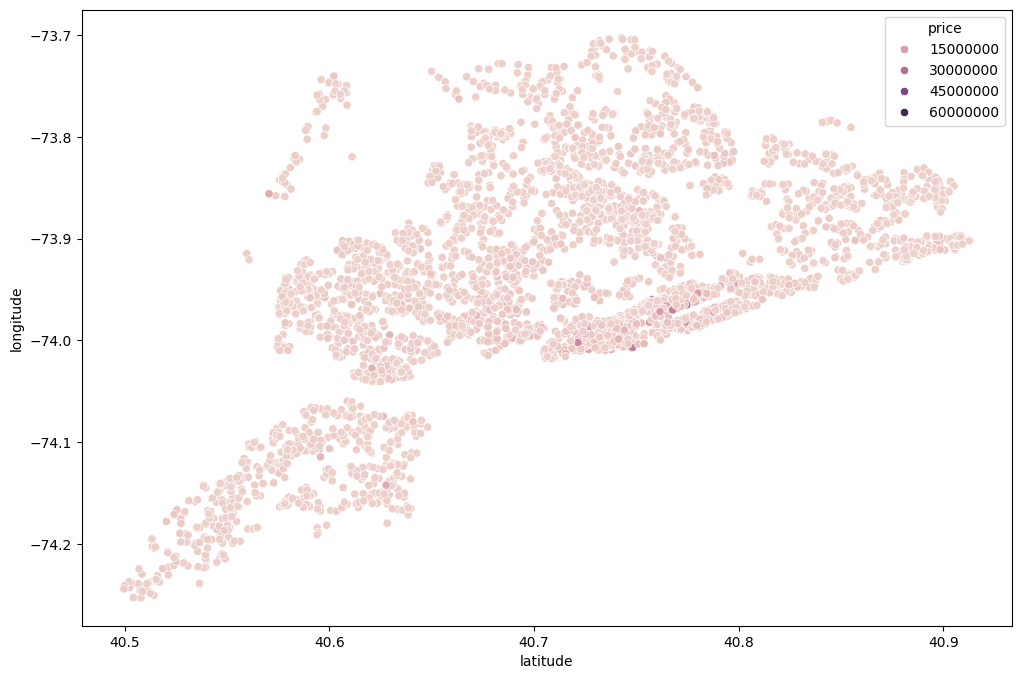

In [96]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="latitude", y="longitude", hue="price", data=df)

<Axes: xlabel='latitude', ylabel='longitude'>

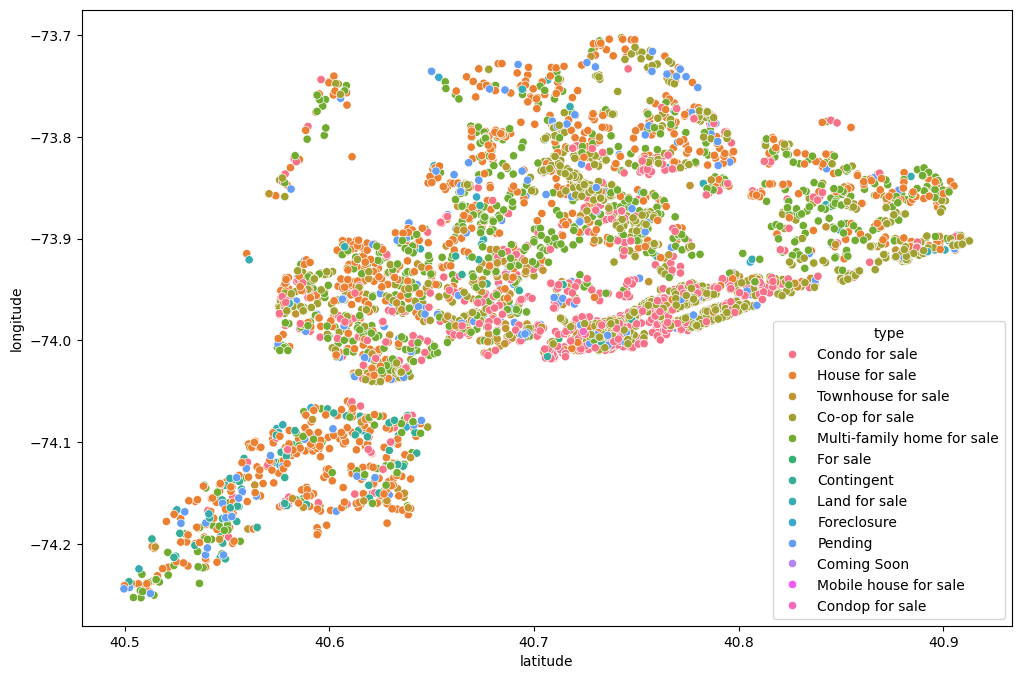

In [97]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="latitude", y="longitude", hue="type", data=df)

<Axes: xlabel='latitude', ylabel='longitude'>

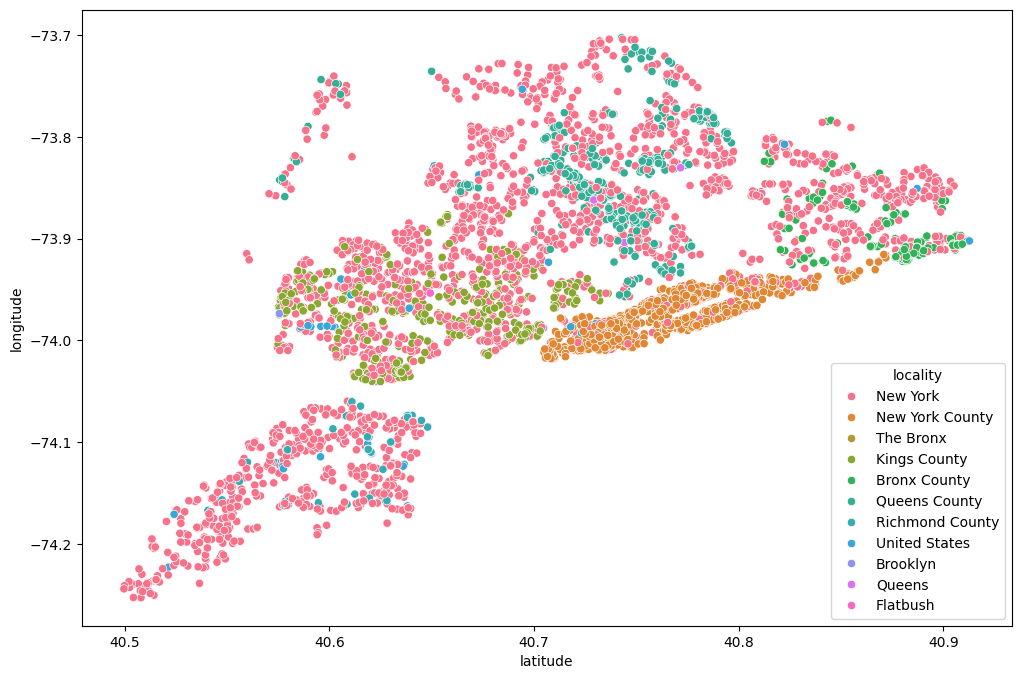

In [98]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="latitude", y="longitude", hue="locality", data=df)

<Axes: xlabel='latitude', ylabel='longitude'>

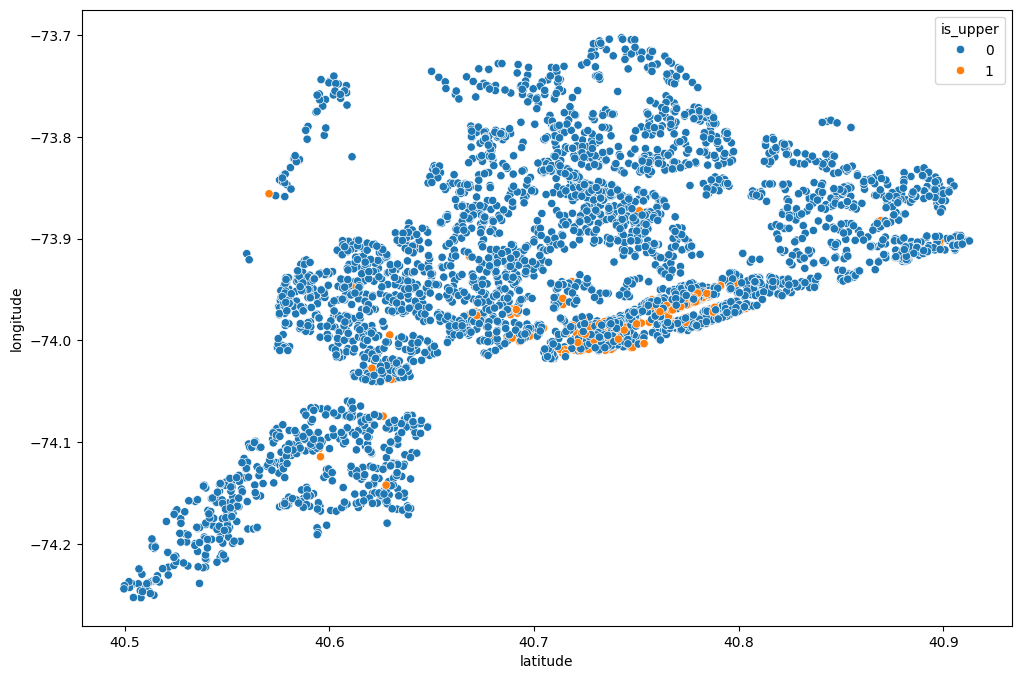

In [99]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="latitude", y="longitude", hue="is_upper", data=df)

In [100]:
from ydata_profiling import ProfileReport

In [101]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [102]:
profile.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Building basiline regression on original dataset

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [104]:
parameter_columns = ['beds', 'bath', 'propertysqft']
target_column = ['price']

In [105]:
X = df[parameter_columns]
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('R2: ', r2)

MAE:  1462917.1982016438
R2:  0.19789140147923012


In [106]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=10, scoring='r2')
print(f"Cross-validated R²: {scores.mean():.3f}")

Cross-validated R²: 0.231


### _R2 baseline score is 0.231_

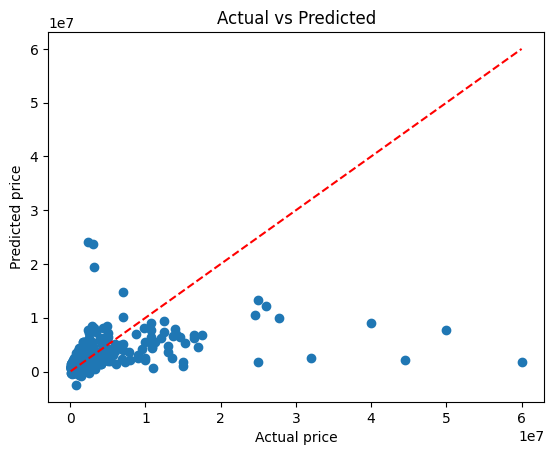

In [107]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted')
plt.show()

## Building baseline regression on log dataset

In [108]:
df['more_2mln'] = np.where(df.price>2000000, 1, 0)

In [109]:
parameter_columns_log = ['log_beds', 'log1_bath', 'log_area']
target_column = ['price']

In [110]:
X = df[parameter_columns_log]
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('R2: ', r2)

MAE:  1698942.266082615
R2:  0.20763475798013142


In [111]:
# Perform cross-validation
scores = cross_val_score(model, X, y, cv=10, scoring='r2')
print(f"Cross-validated R²: {scores.mean():.3f}")

Cross-validated R²: 0.223


### _R2 score on log data is 0.223_

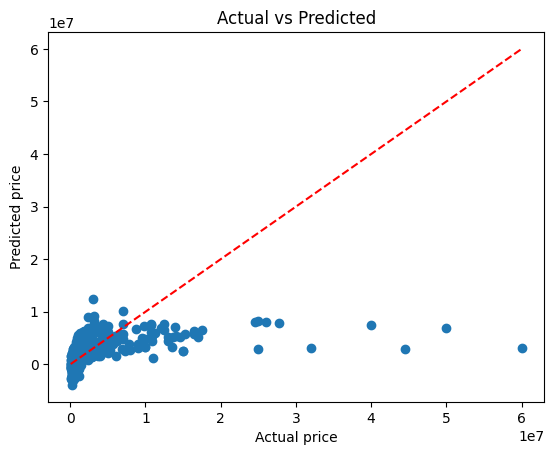

In [112]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted')
plt.show()

In [113]:
df.columns

Index(['type', 'price', 'beds', 'bath', 'propertysqft', 'locality',
       'street_name', 'formatted_address', 'latitude', 'longitude',
       'log_price', 'is_upper', 'log_beds', 'log1_bath', 'area_missing',
       'log_area', 'more_2mln'],
      dtype='object')

## Add is_upper and area_missing

In [114]:
parameter_columns_log = ['log_beds', 'log1_bath', 'log_area', 'is_upper', 'area_missing']
target_column = ['price']

In [115]:
X = df[parameter_columns_log]
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('R2: ', r2)

MAE:  997040.4947479175
R2:  0.5311979231054833


In [116]:
# Perform cross-validation
scores = cross_val_score(model, X, y, cv=10, scoring='r2')
print(f"Cross-validated R²: {scores.mean():.3f}")

Cross-validated R²: 0.577


In [117]:
model.coef_

array([[-103245.08520991,  584056.12203728, 1141101.48881664,
        9765913.42607299,  -29043.86785035]])

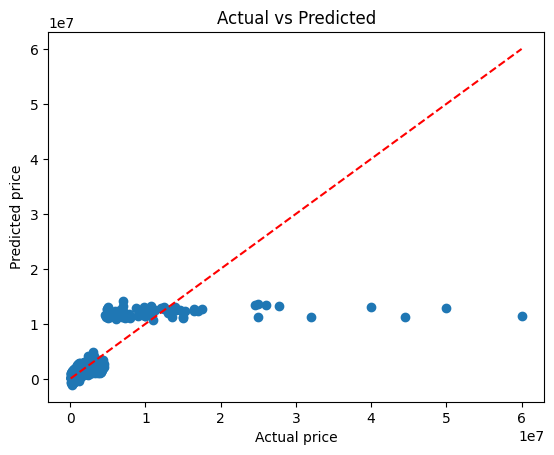

In [118]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted')
plt.show()

## Building baseline regression on limited dataset

In [119]:
df_lower = df[df.price<limiter]

In [120]:
parameter_columns = ['beds', 'bath', 'propertysqft', 'area_missing']
target_column = ['price']

In [121]:
X = df_lower[parameter_columns]
y = df_lower[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('R2: ', r2)

MAE:  473240.15138048644
R2:  0.23322361987140883


In [122]:
# Perform cross-validation
scores = cross_val_score(model, X, y, cv=10, scoring='r2')
print(f"Cross-validated R²: {scores.mean():.3f}")

Cross-validated R²: 0.268


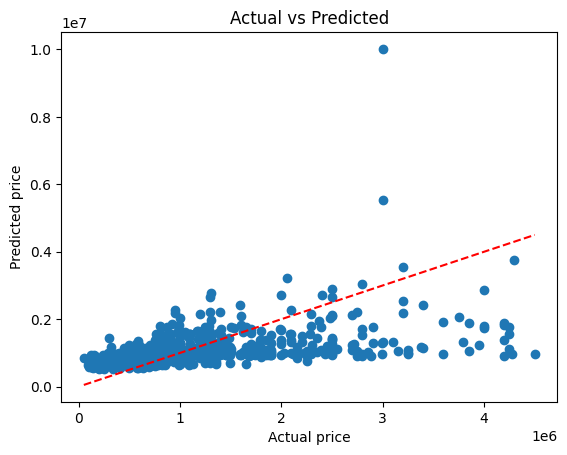

In [123]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted')
plt.show()

## _TODO: Посмотреть что за точки выбросило вверх, из за этого всю регрессию занизило_

In [124]:
limiter

np.float64(4512500.0)

In [125]:
y_pred_series = pd.Series(y_pred.flatten(), index=y_test.index)

In [126]:
#results = pd.DataFrame({'True Value': y_test, 'Predicted Value': y_pred_series})


In [127]:
type(y_pred_series)

pandas.core.series.Series

In [128]:
y_pred_series.name = 'predicted'

In [129]:
y_pred_series

1255    6.744718e+05
2408    9.734505e+05
1690    9.043552e+05
635     2.162762e+06
3320    8.348778e+05
            ...     
969     1.045732e+06
4016    9.074985e+05
1112    6.578164e+05
1347    6.411610e+05
2726    7.646084e+05
Name: predicted, Length: 847, dtype: float64

In [130]:
type(y_test)

pandas.core.frame.DataFrame

In [131]:
y_test.head()

price
1255   210000
2408  1690000
1690   693000
635   2295000
3320   695000

In [132]:
y_test.rename(columns={'price': 'actual_price'}, inplace=True)

In [133]:
y_test.head()

actual_price
1255        210000
2408       1690000
1690        693000
635        2295000
3320        695000

In [134]:
results = y_test.merge(y_pred_series, left_index=True, right_index=True)

In [135]:
results.predicted.astype(int)

1255     674471
2408     973450
1690     904355
635     2162762
3320     834877
         ...   
969     1045731
4016     907498
1112     657816
1347     641161
2726     764608
Name: predicted, Length: 847, dtype: int64

In [136]:
results.predicted = results.predicted.astype(int)

In [137]:
results

actual_price  predicted
1255        210000     674471
2408       1690000     973450
1690        693000     904355
635        2295000    2162762
3320        695000     834877
...            ...        ...
969         569900    1045731
4016        975000     907498
1112        340000     657816
1347        219999     641161
2726        300000     764608

[847 rows x 2 columns]

In [138]:
results.sort_values(by=['predicted'], ascending=False, inplace=True)

In [139]:
results

actual_price  predicted
598        3000000   10016862
4054       3000000    5527213
1995       4295000    3754208
4162       3200000    3549037
4006       2050000    3211512
...            ...        ...
3539        500000     547887
3714        589000     542058
16          199000     527068
316         339000     514576
4483        250000     513910

[847 rows x 2 columns]

In [140]:
df.iloc[598]

type                                    Multi-family home for sale
price                                                      3000000
beds                                                             3
bath                                                            32
propertysqft                                               11760.0
locality                                                  New York
street_name                                               Brooklyn
formatted_address    8001 New Utrecht Ave, Brooklyn, NY 11214, USA
latitude                                                 40.611548
longitude                                               -74.000866
log_price                                                14.914123
is_upper                                                         0
log_beds                                                  1.098612
log1_bath                                                 3.496508
area_missing                                                  

In [141]:
df.iloc[598][parameter_columns]

beds                  3
bath                 32
propertysqft    11760.0
area_missing          0
Name: 598, dtype: object

In [142]:
a_test = pd.DataFrame(df.iloc[598][parameter_columns]).transpose()

In [143]:
a_test.beds = a_test.bath * 1.5

In [144]:
model.predict(a_test)

array([[8442780.26571375]])

In [145]:
df.iloc[4054]

type                                     Multi-family home for sale
price                                                       3000000
beds                                                             24
bath                                                             16
propertysqft                                                12720.0
locality                                               Kings County
street_name                                        Little Caribbean
formatted_address    491-493 E 45th St #16, Brooklyn, NY 11203, USA
latitude                                                   40.64958
longitude                                                -73.934815
log_price                                                 14.914123
is_upper                                                          0
log_beds                                                   3.178054
log1_bath                                                  2.833213
area_missing                                    

In [146]:
df.bath.describe()

count    4579.000000
mean        2.352697
std         1.968149
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        50.000000
Name: bath, dtype: float64

In [147]:
df['beds_to_bath'] = np.where(df.bath==0, 0, df.beds/df.bath)

In [148]:
df.beds_to_bath.describe()

count    4579.000000
mean        1.551797
std         0.716936
min         0.000000
25%         1.000000
50%         1.500000
75%         2.000000
max        11.000000
Name: beds_to_bath, dtype: float64

<Axes: ylabel='beds_to_bath'>

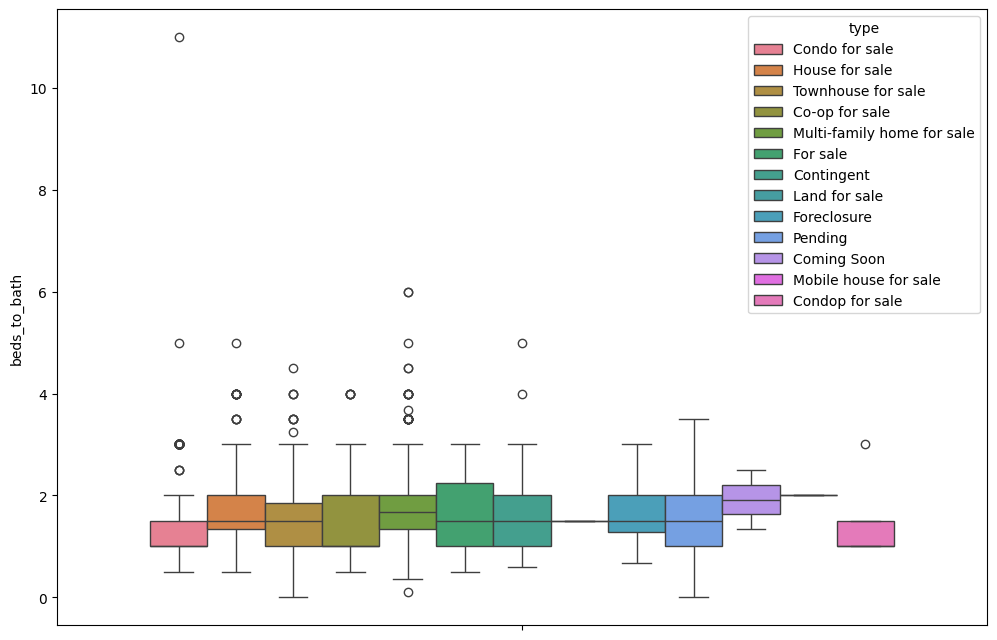

In [149]:
plt.figure(figsize=(12, 8))
sns.boxplot(df, y='beds_to_bath', hue='type')

### Regression for upper segment

In [150]:
df_upper = df[df.price>=limiter]

In [151]:
parameter_columns = ['beds', 'bath', 'propertysqft']
target_column = ['price']

In [152]:
X = df_upper[parameter_columns_log]
y = df_upper[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('R2: ', r2)

MAE:  5170715.535962592
R2:  0.07142214961651117


In [153]:
# Perform cross-validation
scores = cross_val_score(model, X, y, cv=10, scoring='r2')
print(f"Cross-validated R²: {scores.mean():.3f}")

Cross-validated R²: 0.048


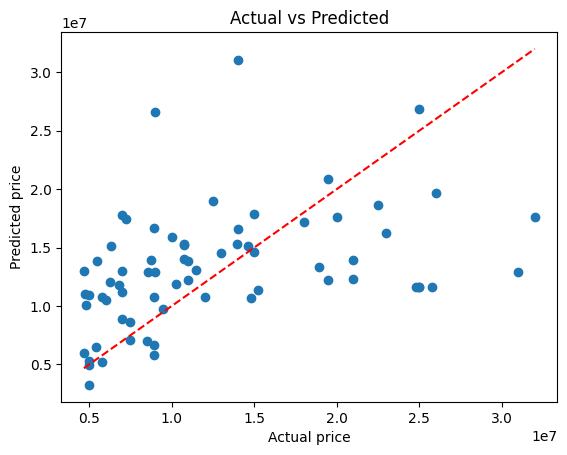

In [154]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted')
plt.show()

In [155]:
parameter_columns_log

['log_beds', 'log1_bath', 'log_area', 'is_upper', 'area_missing']

In [156]:
X = df_upper[parameter_columns_log]
y = df_upper[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('R2: ', r2)

MAE:  5170715.535962592
R2:  0.07142214961651117


In [157]:
# Perform cross-validation
scores = cross_val_score(model, X, y, cv=10, scoring='r2')
print(f"Cross-validated R²: {scores.mean():.3f}")

Cross-validated R²: 0.048


_Log trimmed dataset perform best_

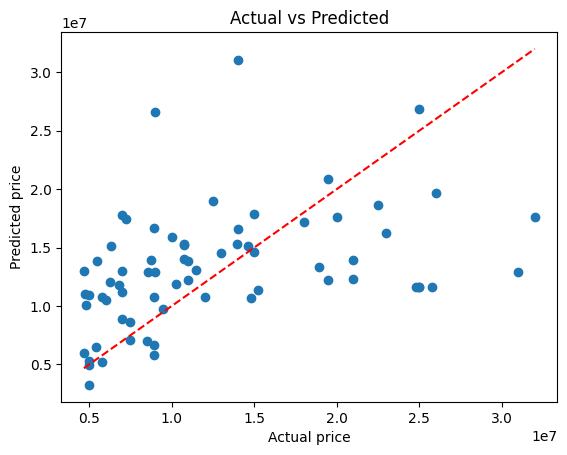

In [158]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted')
plt.show()

# Ridge and Polynomial excluded for now. Go to feature engineering

## Try Ridge

In [219]:
from sklearn.linear_model import RidgeCV

# Try a range of alpha values
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

# Use RidgeCV to find the best alpha
model = RidgeCV(alphas=alphas, cv=5)
model.fit(X, y)

# Best alpha value
print(f"Best alpha: {model.alpha_}")

ValueError: Found input variables with inconsistent numbers of samples: [4234, 4579]

In [220]:
from sklearn.linear_model import Ridge

#X = df[['log_beds', 'log1_bath', 'log_area']]
X = df_lower[['log_beds', 'log1_bath', 'log_area', 'type']+ list(type_encoded_df.iloc[:,1:].columns)]  # Include 'type'
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Ridge(alpha=10.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# y_test_original = np.exp(y_test)
#3y_pred_original = np.exp(y_pred)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('R2: ', r2)

ValueError: Found input variables with inconsistent numbers of samples: [4234, 4579]

In [161]:
# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R²: {scores.mean():.2f}")

Cross-validated R²: 0.21


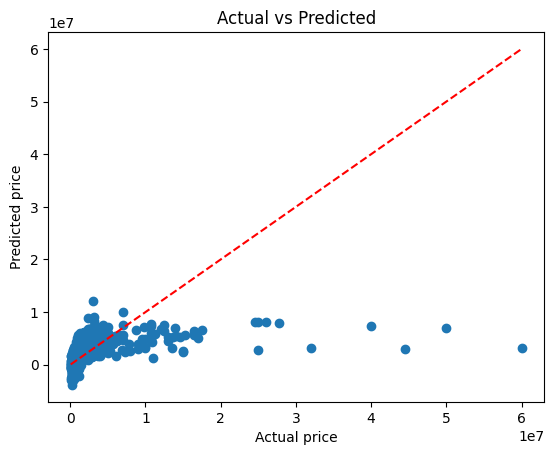

In [162]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted')
plt.show()

## Try polinomial

In [163]:
from sklearn.preprocessing import PolynomialFeatures

# Features (logged)
#X = df[['log_beds', 'log1_bath', 'log_area']]
X = df_lower[['log_beds', 'log1_bath', 'log_area', 'type']+ list(type_encoded_df.iloc[:,1:].columns)]  # Include 'type'

# Target (unlogged)
y = df['price']

# Generate polynomial features (degree=2 includes squared terms and interaction terms)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Check the shape of the transformed data
print(X_poly.shape)  # Should have more columns than the original features

(4579, 9)


In [164]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate MAE and R²
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MAE: ', mae)
print('R²: ', r2)

MAE:  1478880.2837524423
R²:  0.21920826511859115


In [165]:
scores = cross_val_score(model, X_poly, y, cv=5, scoring='r2')
print(f"Cross-validated R²: {scores.mean():.2f}")

Cross-validated R²: 0.28


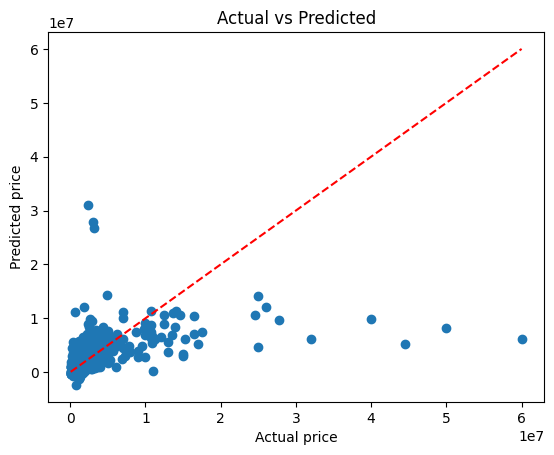

In [166]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted')
plt.show()

# TASK 3: FEATURE ENGINEERING

## OHE for type

In [167]:
df_backup3 = df.copy()

In [168]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False) 

# Fit and transform the 'type' column
type_encoded = encoder.fit_transform(df[['type']])

# Convert the result to a DataFrame
type_encoded_df = pd.DataFrame(type_encoded, columns=encoder.get_feature_names_out(['type']))

# Standartize column names
type_encoded_df.columns = type_encoded_df.columns.str.lower().str.replace(' ', '_')

# Concatenate with the original DataFrame
df = pd.concat([df, type_encoded_df.iloc[:,1:]], axis=1)

In [169]:
df.isna().sum()

type                               0
price                              0
beds                               0
bath                               0
propertysqft                       0
locality                           0
street_name                        0
formatted_address                  0
latitude                           0
longitude                          0
log_price                          0
is_upper                           0
log_beds                           0
log1_bath                          0
area_missing                       0
log_area                           0
more_2mln                          0
beds_to_bath                       0
type_coming_soon                   0
type_condo_for_sale                0
type_condop_for_sale               0
type_contingent                    0
type_for_sale                      0
type_foreclosure                   0
type_house_for_sale                0
type_land_for_sale                 0
type_mobile_house_for_sale         0
t

In [170]:
limiter

np.float64(4512500.0)

In [171]:
df_lower = df[df.price<limiter]

In [172]:
df_lower.shape

(4234, 30)

In [173]:
df_lower.shape[0]/original_length

0.9230433834750381

In [206]:
from sklearn.preprocessing import TargetEncoder
# Add 'type' to X temporarily
X = df_lower[['log_beds', 'log1_bath', 'log_area', 'type']+ list(type_encoded_df.iloc[:,1:].columns)]  # Include 'type'
y = df_lower['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TargetEncoder
encoder = TargetEncoder()

# Isolate the 'type' column
type_train = X_train[['type']]  # Use double brackets to keep it as a DataFrame
type_test = X_test[['type']]

# Fit and transform the 'type' column in the training set
type_train_encoded = encoder.fit_transform(type_train, y_train)

# Transform the 'type' column in the test set
type_test_encoded = encoder.transform(type_test)

# Drop the original 'type' column and add the encoded version
X_train_encoded = X_train.drop(columns=['type'])
X_test_encoded = X_test.drop(columns=['type'])

X_train_encoded['type_encoded'] = None
X_test_encoded['type_encoded'] = None

X_train_encoded['type_encoded'] = type_train_encoded
X_test_encoded['type_encoded'] = type_test_encoded

# Now X_train_encoded and X_test_encoded have the 'type' column replaced with its encoded version


C:\Users\User\.virtualenvs\task2-34zwKzCb\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [201]:
from sklearn.preprocessing import TargetEncoder
# Select features and target 'area_missing', 'log_area',
X = df_lower[['log_beds', 'log1_bath', 'log_area'] + list(type_encoded_df.iloc[:,1:].columns)]
y = df_lower['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

encoder = TargetEncoder()
X_train_encoded = encoder.fit_transform(X_train, y_train)
# Transform the test set
X_test_encoded = encoder.transform(X_test)

C:\Users\User\.virtualenvs\task2-34zwKzCb\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [211]:
pd.DataFrame(X_train_encoded).head(10)

log_beds  log1_bath  log_area  type_coming_soon  type_condo_for_sale  \
4396  1.386294   1.609438  7.421776               0.0                  0.0   
4259  1.791759   1.098612  7.310224               0.0                  0.0   
3414  0.000000   0.693147  6.684612               0.0                  0.0   
3521  1.098612   1.098612  7.244228               0.0                  0.0   
240   0.000000   0.693147  6.418365               0.0                  1.0   
1765  1.098612   1.098612  7.307873               0.0                  0.0   
1239  1.098612   1.098612  7.310224               0.0                  0.0   
613   0.693147   1.098612  7.310224               0.0                  0.0   
3276  1.791759   1.098612  8.094684               0.0                  0.0   
4023  0.693147   1.098612  6.910751               0.0                  1.0   

      type_condop_for_sale  type_contingent  type_for_sale  type_foreclosure  \
4396                   0.0              0.0            0.0               0.0   
4259                   0.0              0.0            0.0               0.0   
3414                   0.0              0.0            0.0               0.0   
3521                   0.0              0.0            0.0               0.0   
240                    0.0              0.0            0.0               0.0   
1765                   0.0              0.0            0.0               0.0   
1239                   0.0              0.0            0.0               0.0   
613                    0.0              0.0            0.0               0.0   
3276                   0.0              0.0            0.0               0.0   
4023                   0.0              0.0            0.0               0.0   

      type_house_for_sale  type_land_for_sale  type_mobile_house_for_sale  \
4396                  0.0                 0.0                         0.0   
4259                  0.0                 0.0                         0.0   
3414                  0.0                 0.0                         0.0   
3521                  1.0                 0.0                         0.0   
240                   0.0                 0.0                         0.0   
1765                  0.0                 0.0                         0.0   
1239                  0.0                 0.0                         0.0   
613                   0.0                 0.0                         0.0   
3276                  0.0                 0.0                         0.0   
4023                  0.0                 0.0                         0.0   

      type_multi-family_home_for_sale  type_pending  type_townhouse_for_sale  \
4396                              0.0           1.0                      0.0   
4259                              0.0           0.0                      1.0   
3414                              0.0           0.0                      0.0   
3521                              0.0           0.0                      0.0   
240                               0.0           0.0                      0.0   
1765                              0.0           0.0                      0.0   
1239                              0.0           0.0                      0.0   
613                               0.0           0.0                      0.0   
3276                              0.0           0.0                      1.0   
4023                              0.0           0.0                      0.0   

      type_encoded  
4396      0.000000  
4259      0.000000  
3414      0.000000  
3521      0.000000  
240       0.002059  
1765      0.000000  
1239      0.000000  
613       0.000000  
3276      0.000000  
4023      0.000000

In [212]:
X_train_encoded.shape

(3387, 16)

In [215]:
X_train.shape

(3387, 16)

In [216]:
type(X_train)

pandas.core.frame.DataFrame

In [217]:
type(X_train_encoded)

pandas.core.frame.DataFrame

In [213]:
y_pred.shape

(847,)

In [209]:
# Train the model
model = LinearRegression()
model.fit(X_train_encoded, y_train)

# Evaluate the model
y_pred = model.predict(X_test_encoded)
#y_test_original = np.exp(y_test)
#y_pred_original = np.exp(y_pred_log)

mae_original = mean_absolute_error(y_test, y_pred)
r2_original = r2_score(y_test, y_pred)
print(f"MAE in original scale: {mae_original:.2f}")
print(f"R² in original scale: {r2_original:.2f}")

ValueError: could not broadcast input array from shape (959,3387) into shape (1,3387)

In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
#y_test_original = np.exp(y_test)
#y_pred_original = np.exp(y_pred_log)

mae_original = mean_absolute_error(y_test, y_pred)
r2_original = r2_score(y_test, y_pred)
print(f"MAE in original scale: {mae_original:.2f}")
print(f"R² in original scale: {r2_original:.2f}")

In [176]:
# Perform cross-validation
scores = cross_val_score(model, X, y, cv=4, scoring='r2')
print(f"Cross-validated R²: {scores.mean():.2f}")

Cross-validated R²: 0.41


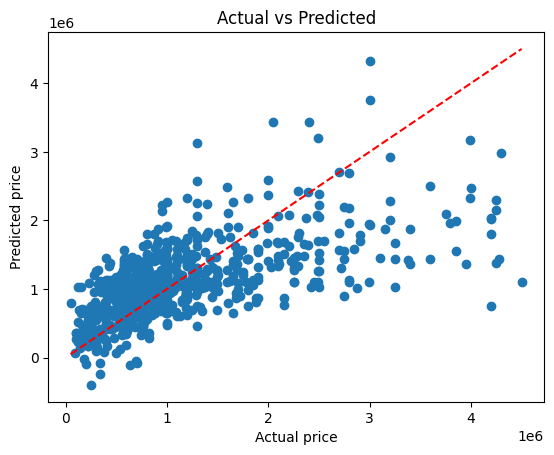

In [177]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted')
plt.show()

## _R2 Baseline after One Hot Encoder is 0.41_

In [197]:
# Target Encoding (if you want to try it)
from sklearn.preprocessing import TargetEncoder
encoder = TargetEncoder()
df['type_target_encoded'] = encoder.fit_transform(df[['type']], df['price'].values)

C:\Users\User\.virtualenvs\task2-34zwKzCb\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [198]:
df.type_target_encoded.describe()

count    4579.000000
mean        0.000212
std         0.000380
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.000902
Name: type_target_encoded, dtype: float64

In [199]:
df.type_target_encoded.value_counts()

type_target_encoded
0.000000    3494
0.000902     282
0.000894     272
0.000889     266
0.000888     264
0.000273       1
Name: count, dtype: int64

In [200]:
df.columns

Index(['type', 'price', 'beds', 'bath', 'propertysqft', 'locality',
       'street_name', 'formatted_address', 'latitude', 'longitude',
       'log_price', 'is_upper', 'log_beds', 'log1_bath', 'area_missing',
       'log_area', 'more_2mln', 'beds_to_bath', 'type_coming_soon',
       'type_condo_for_sale', 'type_condop_for_sale', 'type_contingent',
       'type_for_sale', 'type_foreclosure', 'type_house_for_sale',
       'type_land_for_sale', 'type_mobile_house_for_sale',
       'type_multi-family_home_for_sale', 'type_pending',
       'type_townhouse_for_sale', 'type_target_encoded'],
      dtype='object')